In [1]:
!pip install pycountry_convert

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 48.9 MB/s eta 0:00:00


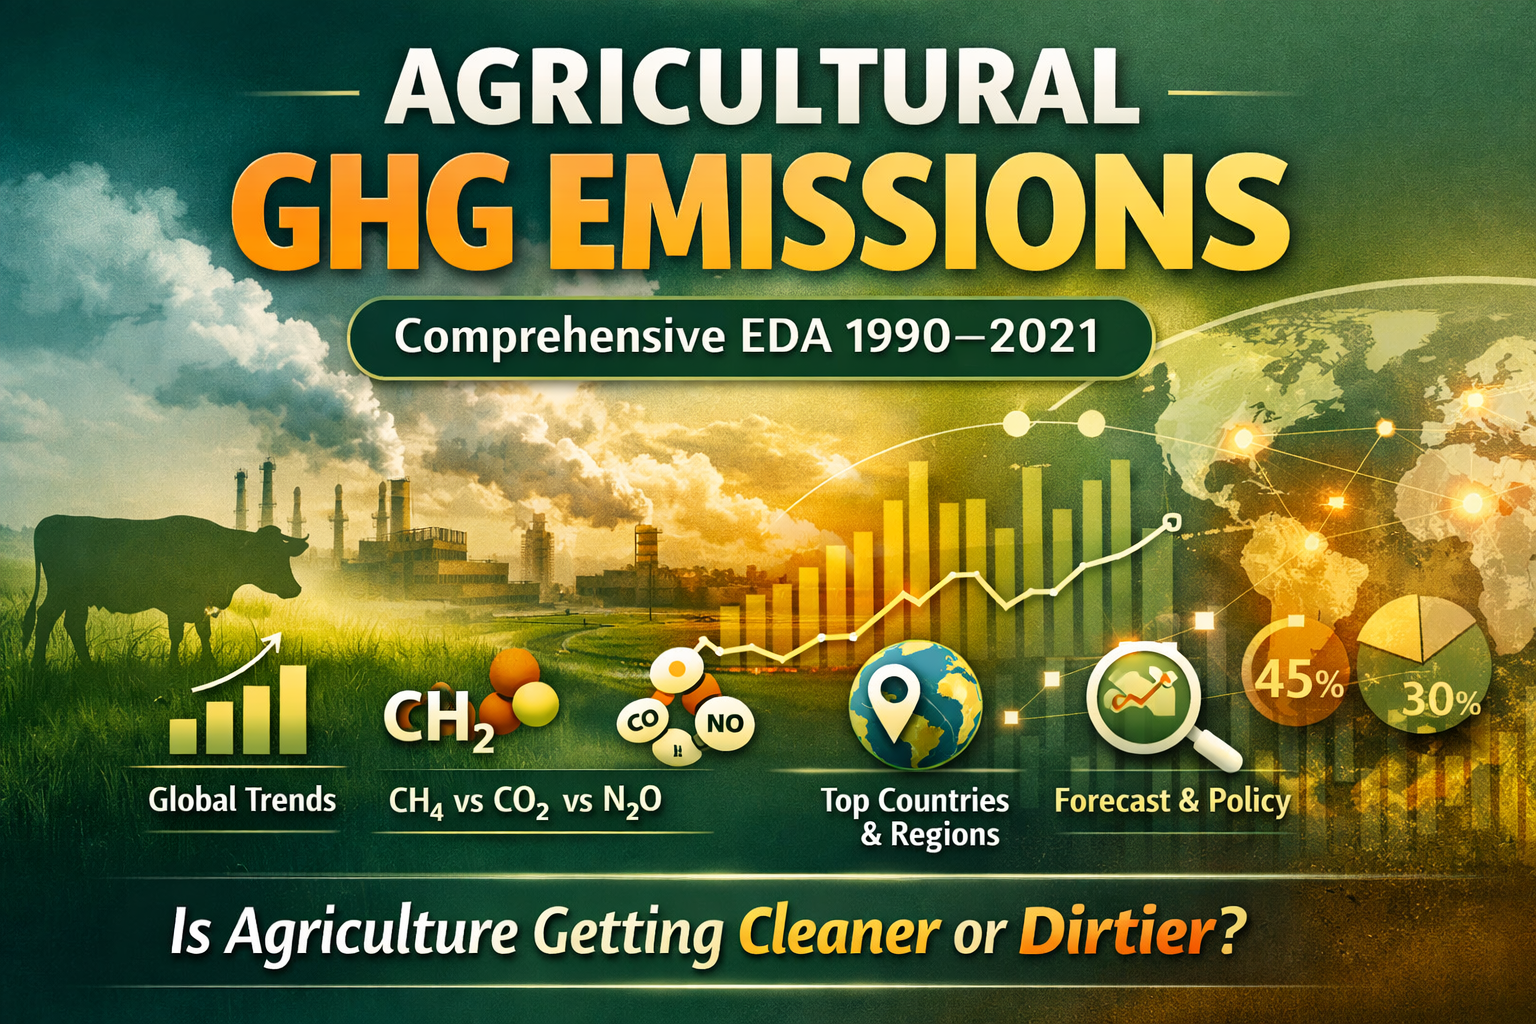

In [2]:
from IPython.display import Image, display
display(Image(filename='/kaggle/input/ghg-thumbnail/ghg.png'))

# **🌱 Agricultural Greenhouse Gas Emissions: A Comprehensive EDA (1990–2021)**

📌 **Project Overview**  
Agriculture is a critical pillar of global food security, but it is also one of the largest sources of greenhouse gas (GHG) emissions. This notebook provides a **deep and structured exploratory data analysis** of agricultural GHG emissions from **1990 to 2021**, with a focus on understanding the **global, regional, and country-level trends**, gas composition, and policy-relevant insights.

---

## **🔍 Why This Analysis Matters**

Agricultural emissions are unique because they are not only driven by **energy use** but also by **biological processes** (livestock digestion, soil management, fertilizer application). As the world’s population grows and diets change, the challenge is to **produce more food while emitting less**.

This notebook aims to answer critical questions such as:

- 🌍 **Is agriculture becoming cleaner or dirtier over time?**  
- 🧪 **Which gas (CH₄, CO₂, N₂O) is driving emissions the most?**  
- 🌎 **Which countries or regions are leading or lagging in mitigation?**  
- 📈 **Are there structural shifts or sudden emission spikes?**  
- 🧠 **Which countries show promising signs of decoupling economic growth from emissions?**

---

## **📌 Key Objectives**

This notebook is organized into **10 core analytical sections**, each designed to provide actionable insights:

1. **Dataset Integrity & Structure** 🔍  
2. **Global Emission Landscape** 🌍  
3. **Gas Composition Analysis (CH₄ vs CO₂ vs N₂O)** 🔬  
4. **Country-Level Emission Profiling** 🗺️  
5. **Regional & Development Pattern Insights** 🌎  
6. **Structural Change Detection** 📉  
7. **Growth Rate & Dynamics Analysis** 🔄  
8. **Anomaly & Outlier Detection** ⚠️  
9. **Time-Series Readiness & Forecast Signals** 🔮  
10. **Policy-Relevant Insights** 🧠  

---

## **✨ What You Will Learn**

By the end of this notebook, you will be able to:

- Evaluate the **completeness and reliability** of global agricultural GHG reporting  
- Identify **major emission drivers** and gas composition trends  
- Recognize **top emitting countries**, emerging emitters, and declining emitters  
- Understand **regional shifts** and patterns of mitigation  
- Detect **structural breaks and anomalies** in emission trends  
- Determine **which countries are suitable for forecasting** and policy action  

---

## **🚀 Let’s begin the analysis**


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pycountry_convert as pc
import warnings

In [4]:
warnings.filterwarnings('ignore')

# ===============================
# FAO / SDG-2 DARK THEME
# ===============================

plt.rcParams.update({
    # Background
    "figure.facecolor": "#0F1E17",
    "axes.facecolor": "#0F1E17",
    "savefig.facecolor": "#0F1E17",

    # Axes
    "axes.edgecolor": "#6B8F71",
    "axes.labelcolor": "#E6E6E6",
    "axes.titlecolor": "#F1FAEE",
    "axes.titlesize": 15,
    "axes.titleweight": "bold",

    # Grid
    "grid.color": "#2F4F3E",
    "grid.linestyle": "--",
    "grid.linewidth": 0.6,

    # Ticks
    "xtick.color": "#DAD7CD",
    "ytick.color": "#DAD7CD",

    # Text
    "text.color": "#E6E6E6",
    "font.size": 11,

    # Legend
    "legend.facecolor": "#1B2A24",
    "legend.edgecolor": "#6B8F71",

    # Lines
    "lines.linewidth": 2.4,
    "lines.markersize": 6
})

sns.set_style("whitegrid", {
    "grid.color": "#2F4F3E",
    "axes.edgecolor": "#6B8F71"
})


GHG_COLORS = {
    "Emissions (CH4)": "#A7C957",   # methane → green
    "Emissions (CO2)": "#E63946",   # CO2 → muted red
    "Emissions (N2O)": "#F2CC8F"    # N2O → wheat/sand
}


In [5]:
df = pd.read_csv("/kaggle/input/global-greenhouse-gas-emissions-from-agriculture/global_greenhouse_gas_emission_from_agriculture.csv")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22216 entries, 0 to 22215
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       22216 non-null  object 
 1   Domain            22216 non-null  object 
 2   Area Code (M49)   22216 non-null  int64  
 3   Area              22216 non-null  object 
 4   Element Code      22216 non-null  int64  
 5   Element           22216 non-null  object 
 6   Item Code         22216 non-null  int64  
 7   Item              22216 non-null  object 
 8   Year Code         22216 non-null  int64  
 9   Year              22216 non-null  int64  
 10  Source Code       22216 non-null  int64  
 11  Source            22216 non-null  object 
 12  Unit              22216 non-null  object 
 13  Value             22216 non-null  float64
 14  Flag              22216 non-null  object 
 15  Flag Description  22216 non-null  object 
 16  Note              0 non-null      float6

# **🔍 1️⃣ Dataset Integrity & Structure Insights**

### **1. Temporal Coverage Verification (1990–2021)**
**📊 Heatmap: Year Coverage by Country**

This visually confirms no missing years per country.

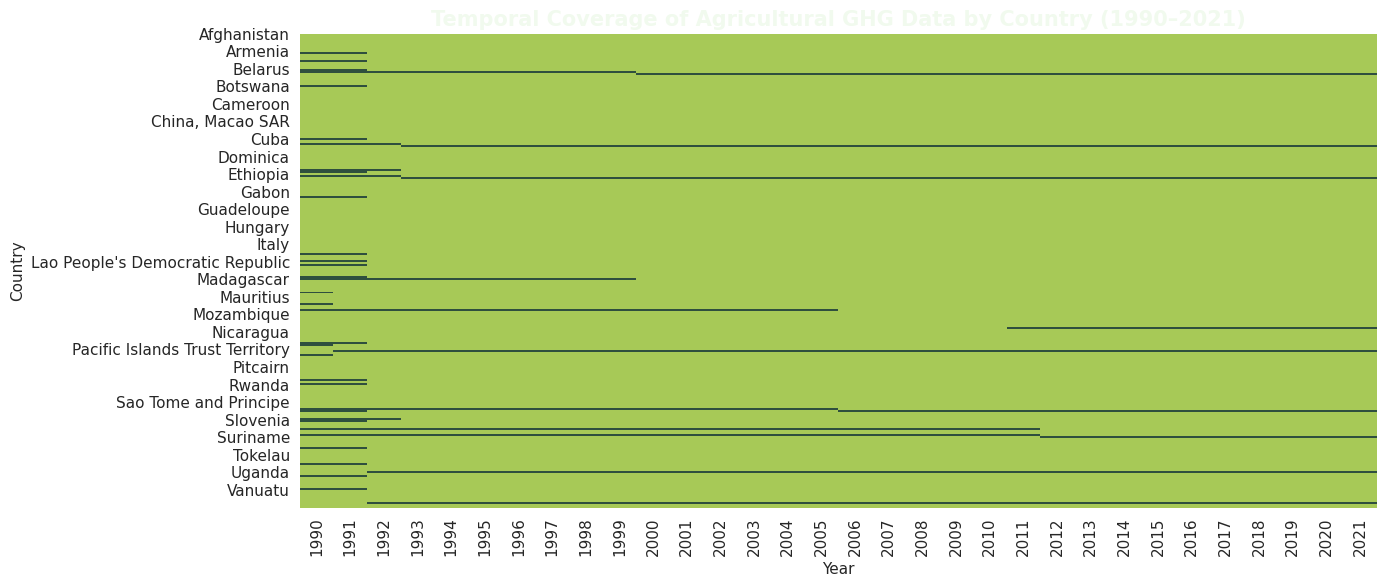

In [7]:
# Create year coverage table
year_coverage = (
    df.groupby(["Area", "Year"])
      .size()
      .unstack(fill_value=0)
)

plt.figure(figsize=(14,6))
sns.heatmap(
    year_coverage > 0,
    cmap=["#2F4F3E", "#A7C957"],
    cbar=False
)

plt.title("Temporal Coverage of Agricultural GHG Data by Country (1990–2021)")
plt.xlabel("Year")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

### **2. Countries with Missing or Partial Records**
**📊 Bar Chart: Missing Years Count per Country**

(Should ideally be zero)

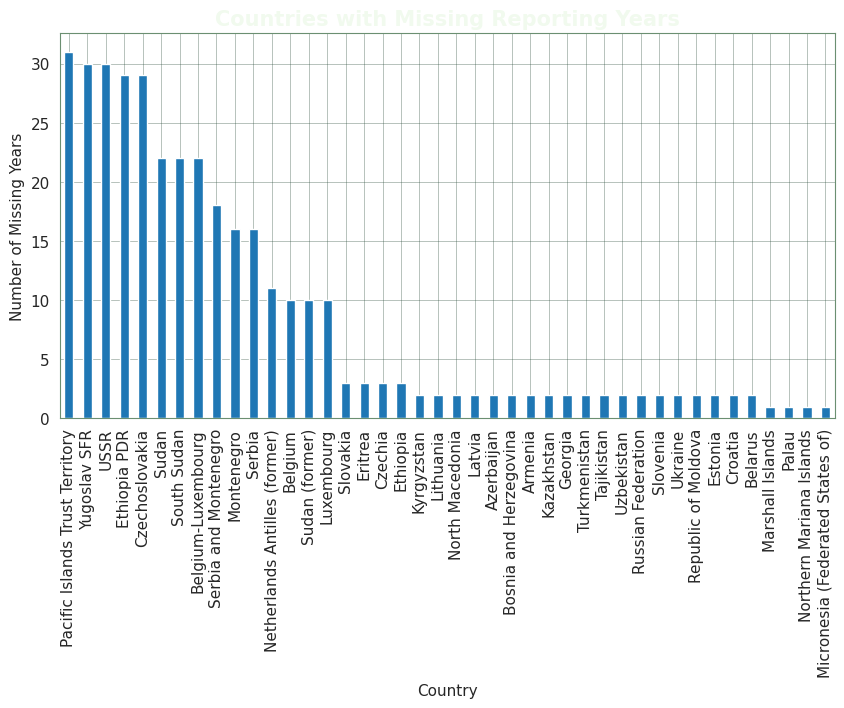

In [8]:
expected_years = df["Year"].nunique()

missing_years = (
    df.groupby("Area")["Year"]
      .nunique()
      .rsub(expected_years)
      .sort_values(ascending=False)
)

plt.figure(figsize=(10,5))
missing_years[missing_years > 0].plot(kind="bar")

plt.title("Countries with Missing Reporting Years")
plt.xlabel("Country")
plt.ylabel("Number of Missing Years")
plt.grid(True, alpha=0.4)
plt.show()

### **3. Unit Consistency Check**
**📊 Unit Distribution**

Confirms single-unit reporting (kt).

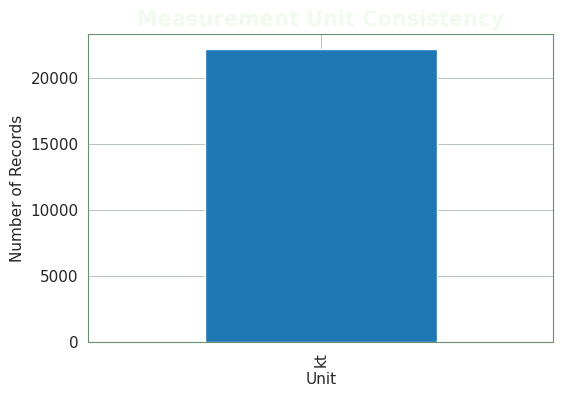

In [9]:
plt.figure(figsize=(6,4))
df["Unit"].value_counts().plot(kind="bar")

plt.title("Measurement Unit Consistency")
plt.xlabel("Unit")
plt.ylabel("Number of Records")
plt.grid(True, alpha=0.4)
plt.show()

### **4. Data Quality Flag Analysis (Estimated Values)**
**📊 % of Estimated Values by Year**

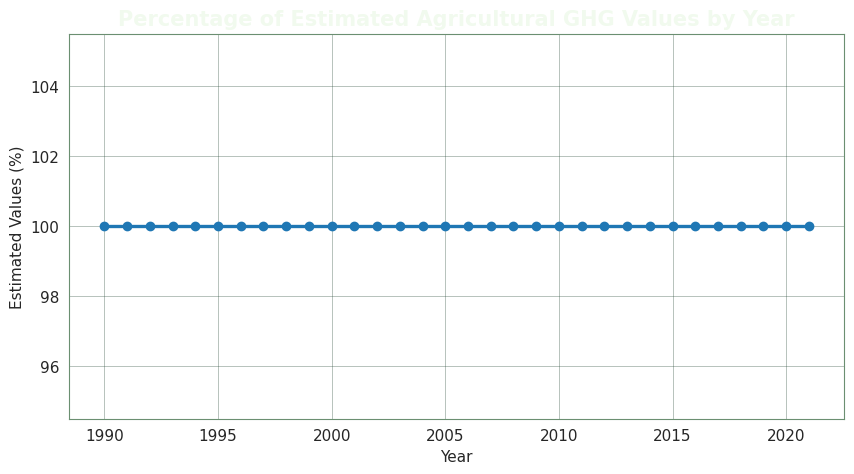

In [10]:
flag_year = (
    df.assign(is_estimated=df["Flag"] == "E")
      .groupby("Year")["is_estimated"]
      .mean() * 100
)

plt.figure(figsize=(10,5))
plt.plot(flag_year.index, flag_year.values, marker="o")

plt.title("Percentage of Estimated Agricultural GHG Values by Year")
plt.xlabel("Year")
plt.ylabel("Estimated Values (%)")
plt.grid(True, alpha=0.4)
plt.show()

**📊 % of Estimated Values by Country (Top 15)**

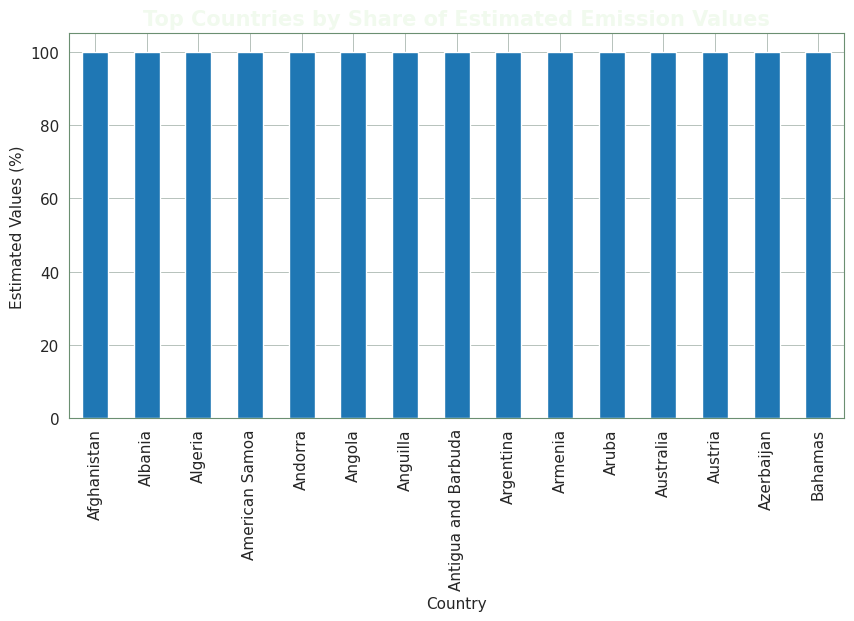

In [11]:
flag_country = (
    df.assign(is_estimated=df["Flag"] == "E")
      .groupby("Area")["is_estimated"]
      .mean()
      .sort_values(ascending=False)
      .head(15) * 100
)

plt.figure(figsize=(10,5))
flag_country.plot(kind="bar")

plt.title("Top Countries by Share of Estimated Emission Values")
plt.xlabel("Country")
plt.ylabel("Estimated Values (%)")
plt.grid(True, alpha=0.4)
plt.show()

### **5. Structural Duplicate Detection**
**📊 Duplicate Records Check**

(Validates one record per country–year–gas)

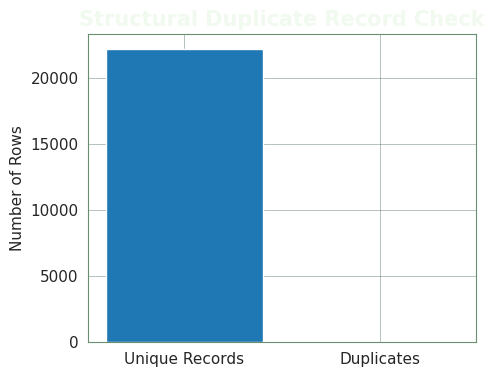

In [12]:
duplicates = df.duplicated(
    subset=["Area", "Year", "Element"],
    keep=False
)

duplicate_count = duplicates.sum()

plt.figure(figsize=(5,4))
plt.bar(["Unique Records", "Duplicates"],
        [len(df) - duplicate_count, duplicate_count])

plt.title("Structural Duplicate Record Check")
plt.ylabel("Number of Rows")
plt.grid(True, alpha=0.4)
plt.show()

### **6. Validation of Emission Scope (Agricultural Land Only)**
**📊 Item Category Distribution**

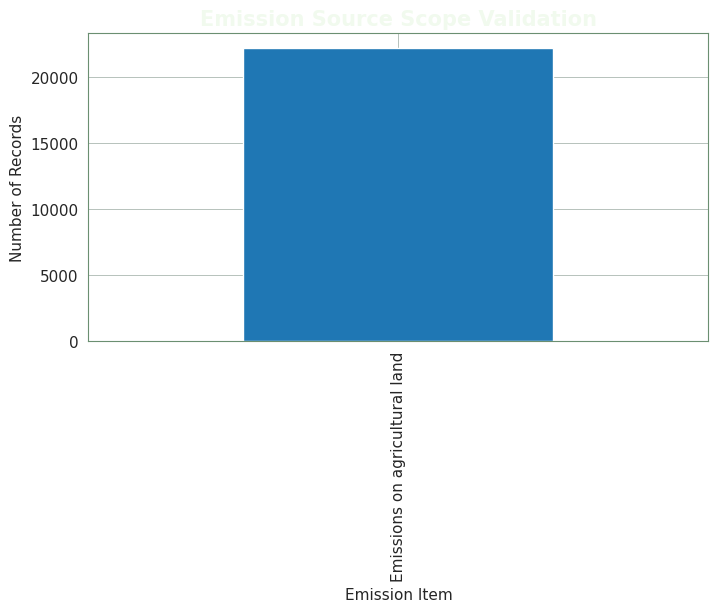

In [13]:
plt.figure(figsize=(8,4))
df["Item"].value_counts().plot(kind="bar")

plt.title("Emission Source Scope Validation")
plt.xlabel("Emission Item")
plt.ylabel("Number of Records")
plt.grid(True, alpha=0.4)
plt.show()

# **🌍 2️⃣ Global Emission Landscape (Macro View)**

### **1. Total Global Agricultural GHG Emissions (1990–2021)**
**📊 Line Plot: Global Emissions Over Time**

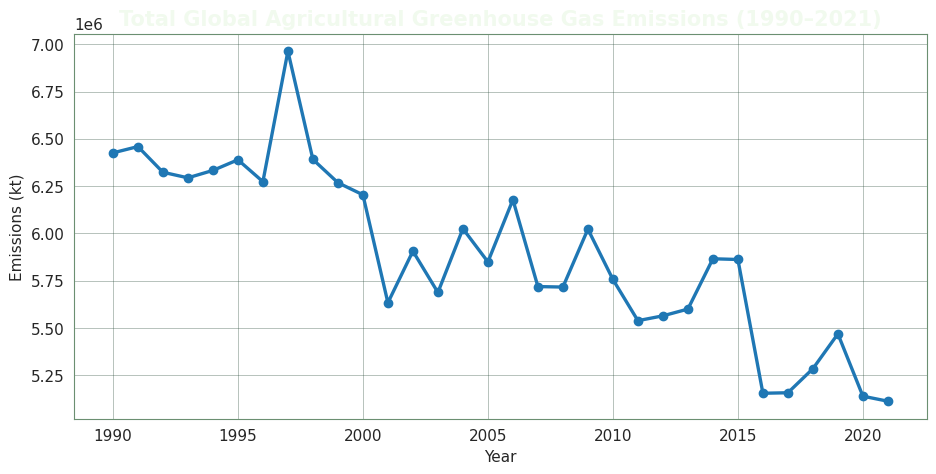

In [14]:
# Global emissions = sum of all countries per year
global_emissions = (
    df.groupby("Year")["Value"]
      .sum()
)

plt.figure(figsize=(11,5))
plt.plot(global_emissions.index, global_emissions.values, marker="o")

plt.title("Total Global Agricultural Greenhouse Gas Emissions (1990–2021)")
plt.xlabel("Year")
plt.ylabel("Emissions (kt)")
plt.grid(True, alpha=0.4)
plt.show()

### **2. Global Year-over-Year (YoY) Growth Rate**
**📊 YoY % Change Plot**

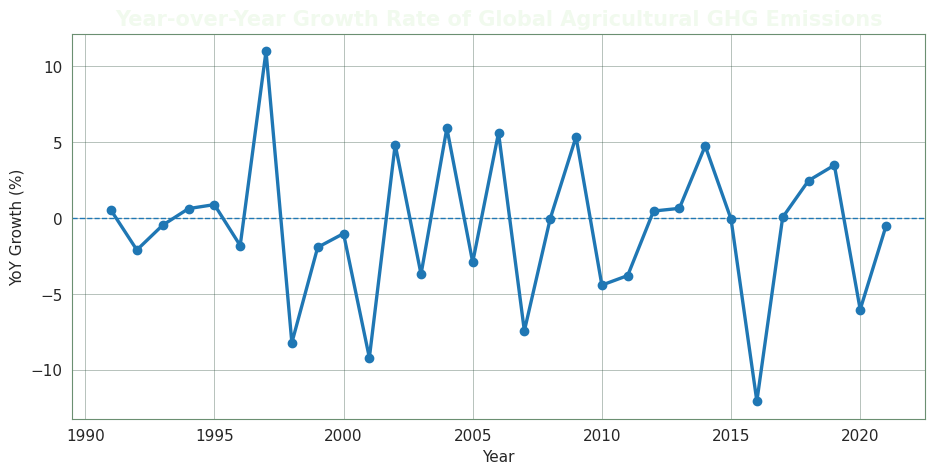

In [15]:
yoy_growth = global_emissions.pct_change() * 100

plt.figure(figsize=(11,5))
plt.plot(yoy_growth.index, yoy_growth.values, marker="o")

plt.axhline(0, linestyle="--", linewidth=1)

plt.title("Year-over-Year Growth Rate of Global Agricultural GHG Emissions")
plt.xlabel("Year")
plt.ylabel("YoY Growth (%)")
plt.grid(True, alpha=0.4)
plt.show()

### **3. Long-Term Growth (CAGR)**
**📐 Calculate & Display CAGR (1990–2021)**

In [16]:
start_year, end_year = global_emissions.index.min(), global_emissions.index.max()
start_value, end_value = global_emissions.iloc[0], global_emissions.iloc[-1]
years = end_year - start_year

cagr = ((end_value / start_value) ** (1 / years) - 1) * 100

cagr

np.float64(-0.7347147613192107)

### **4. Inflection Point Detection (Structural Changes)**
**📊 Emissions with Key Period Markers**

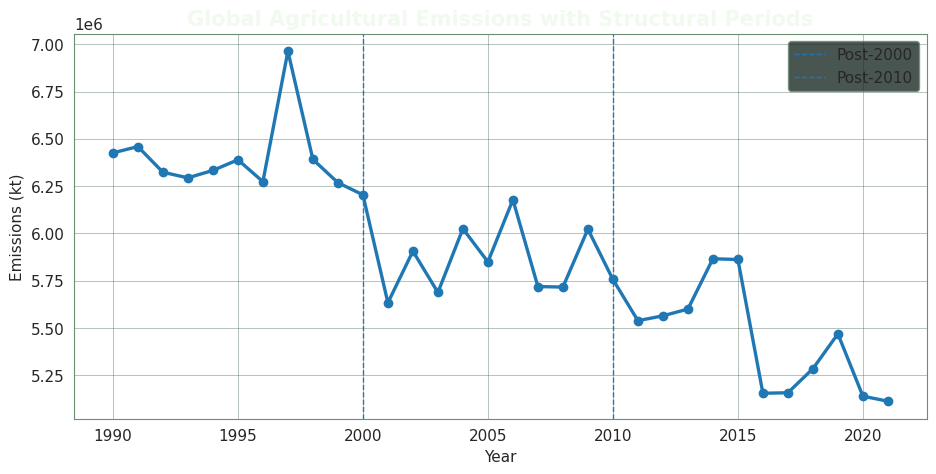

In [17]:
plt.figure(figsize=(11,5))
plt.plot(global_emissions.index, global_emissions.values, marker="o")

plt.axvline(2000, linestyle="--", linewidth=1, label="Post-2000")
plt.axvline(2010, linestyle="--", linewidth=1, label="Post-2010")

plt.title("Global Agricultural Emissions with Structural Periods")
plt.xlabel("Year")
plt.ylabel("Emissions (kt)")
plt.legend()
plt.grid(True, alpha=0.4)
plt.show()

### **5. Early vs Recent Decade Comparison**
**📊 Bar Plot: 1990s vs 2010s Average Emissions**

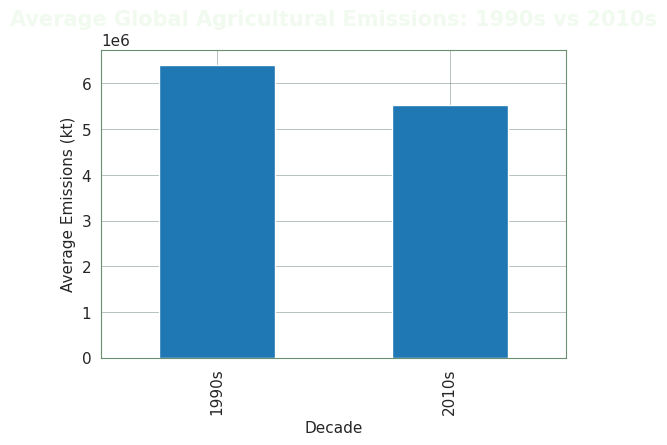

In [18]:
# ===============================
# Global Decade Comparison (1990s vs 2010s)
# ===============================

# Step 1: Build global emissions by aggregating all countries
df_global = (
    df.groupby("Year", as_index=False)["Value"]
      .sum()
)

# Step 2: Assign decades
df_global["Decade"] = df_global["Year"].apply(
    lambda x: "1990s" if 1990 <= x <= 1999 else
              "2010s" if 2010 <= x <= 2019 else None
)

# Step 3: Compute average emissions per decade
decade_avg = (
    df_global.dropna()
             .groupby("Decade")["Value"]
             .mean()
)

# Step 4: Plot
plt.figure(figsize=(6,4))
decade_avg.plot(kind="bar")

plt.title("Average Global Agricultural Emissions: 1990s vs 2010s")
plt.xlabel("Decade")
plt.ylabel("Average Emissions (kt)")
plt.grid(True, alpha=0.4)
plt.show()


### **6. Acceleration vs Stabilization Analysis**
**📊 Rolling Growth Trend (5-Year Moving Average)**

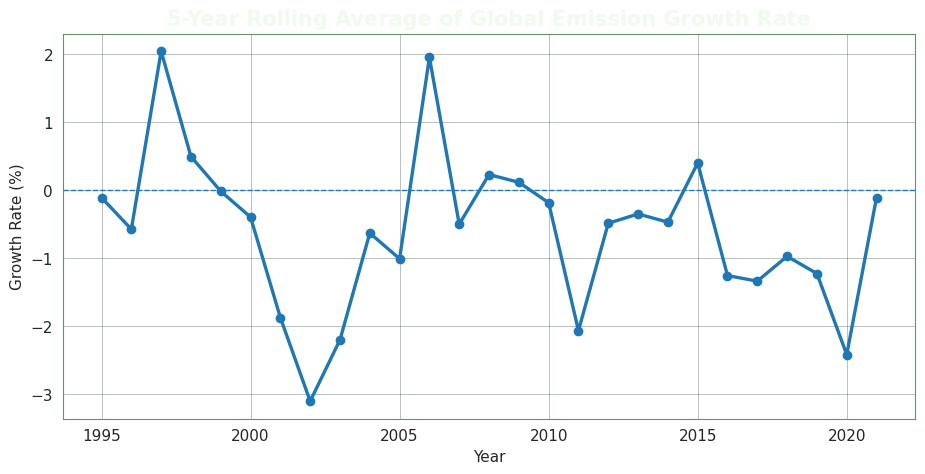

In [19]:
rolling_growth = yoy_growth.rolling(5).mean()

plt.figure(figsize=(11,5))
plt.plot(rolling_growth.index, rolling_growth.values, marker="o")

plt.axhline(0, linestyle="--", linewidth=1)

plt.title("5-Year Rolling Average of Global Emission Growth Rate")
plt.xlabel("Year")
plt.ylabel("Growth Rate (%)")
plt.grid(True, alpha=0.4)
plt.show()

# **🔬 3️⃣ Gas Composition Analysis (CH₄ vs CO₂ vs N₂O)**

### **1. Global Percentage Contribution of Each Gas**
**📊 Donut Chart: Overall Gas Share (1990–2021)**

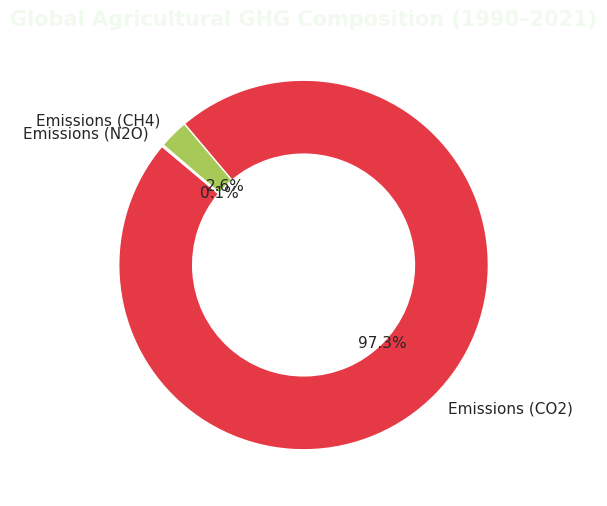

In [20]:
# Global total by gas (entire period)
global_gas_total = (
    df.groupby("Element")["Value"]
      .sum()
      .sort_values(ascending=False)
)

plt.figure(figsize=(6,6))
plt.pie(
    global_gas_total.values,
    labels=global_gas_total.index,
    autopct="%1.1f%%",
    startangle=140,
    colors=[GHG_COLORS[g] for g in global_gas_total.index],
    wedgeprops={"width": 0.4}
)

plt.title("Global Agricultural GHG Composition (1990–2021)")
plt.show()

### **2. Temporal Evolution of Gas Mix**
**📊 Stacked Area Chart: Gas Composition Over Time**

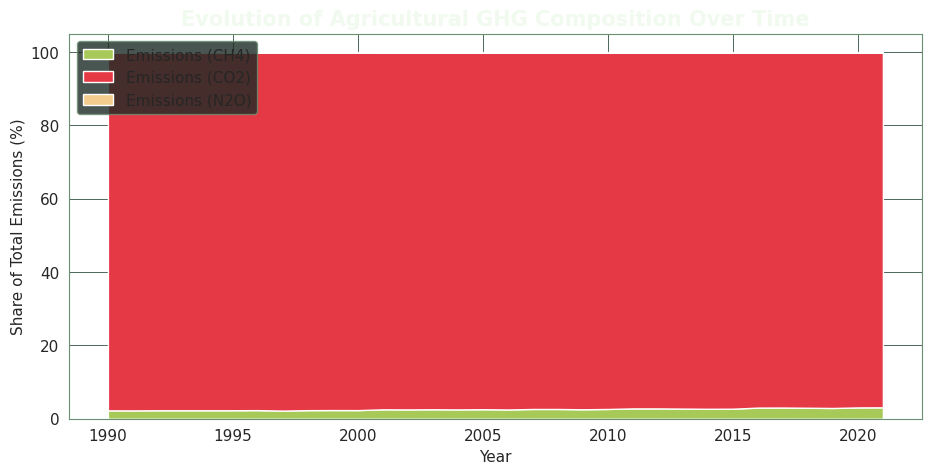

In [21]:
# Global emissions per gas per year
gas_time = (
    df.groupby(["Year", "Element"])["Value"]
      .sum()
      .unstack()
)

# Convert to percentage
gas_share = gas_time.div(gas_time.sum(axis=1), axis=0) * 100

plt.figure(figsize=(11,5))
plt.stackplot(
    gas_share.index,
    gas_share.T,
    labels=gas_share.columns,
    colors=[GHG_COLORS[g] for g in gas_share.columns]
)

plt.title("Evolution of Agricultural GHG Composition Over Time")
plt.xlabel("Year")
plt.ylabel("Share of Total Emissions (%)")
plt.legend(loc="upper left")
plt.show()

### **3. Country-Level Gas Profiles**
**📊 Bar Chart: Gas Mix for Selected Countries**

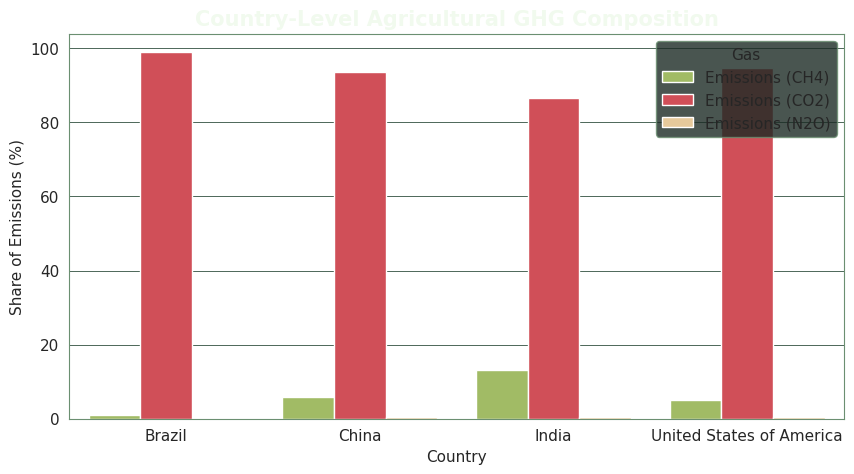

In [22]:
selected_countries = ["China", "India", "United States of America", "Brazil"]

# 1) Aggregate total emissions by country & gas
country_gas = (
    df[df["Area"].isin(selected_countries)]
    .groupby(["Area", "Element"], as_index=False)["Value"]
    .sum()
)

# 2) Convert to percentage share per country
country_gas["Share"] = (
    country_gas.groupby("Area")["Value"]
    .transform(lambda x: x / x.sum() * 100)
)

# 3) Plot
plt.figure(figsize=(10,5))
sns.barplot(
    data=country_gas,
    x="Area",
    y="Share",
    hue="Element",
    palette=GHG_COLORS
)

plt.title("Country-Level Agricultural GHG Composition")
plt.xlabel("Country")
plt.ylabel("Share of Emissions (%)")
plt.legend(title="Gas")
plt.show()

### **4. Structural Shifts in Gas Composition (Decade Comparison)**
**📊 1990s vs 2010s Gas Share**

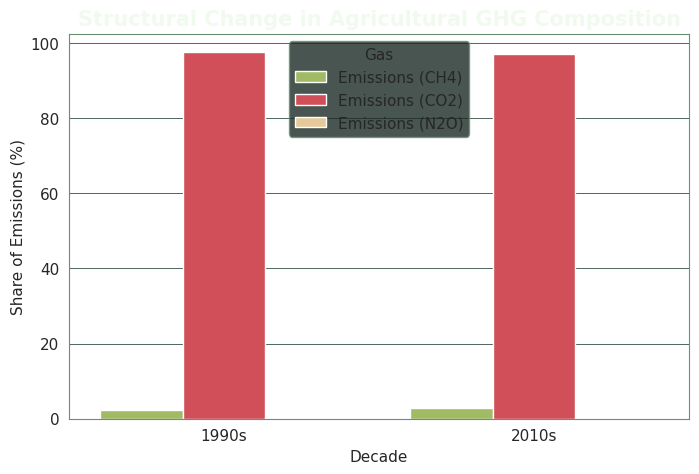

In [23]:
# 1) Add decade column
df_decade = df.copy()
df_decade["Decade"] = df_decade["Year"].apply(
    lambda x: "1990s" if 1990 <= x <= 1999 else
              "2010s" if 2010 <= x <= 2019 else None
)

df_decade = df_decade.dropna(subset=["Decade"])

# 2) Aggregate by decade & gas
decade_gas = (
    df_decade.groupby(["Decade", "Element"], as_index=False)["Value"]
             .sum()
)

# 3) Convert to percentage share per decade
decade_gas["Share"] = (
    decade_gas.groupby("Decade")["Value"]
              .transform(lambda x: x / x.sum() * 100)
)

# 4) Plot
plt.figure(figsize=(8,5))
sns.barplot(
    data=decade_gas,
    x="Decade",
    y="Share",
    hue="Element",
    palette=GHG_COLORS
)

plt.title("Structural Change in Agricultural GHG Composition")
plt.xlabel("Decade")
plt.ylabel("Share of Emissions (%)")
plt.legend(title="Gas")
plt.show()

### **5. Gases Driving Emission Growth**
**📊 Growth Contribution Since 1990**

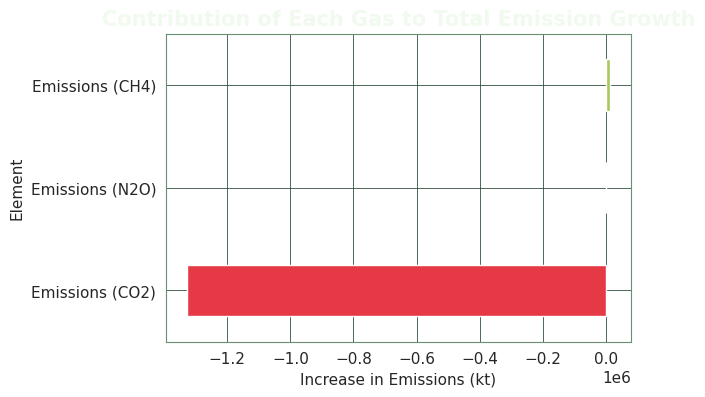

In [24]:
gas_growth = (
    df.groupby(["Year", "Element"])["Value"]
      .sum()
      .unstack()
)

growth_contribution = gas_growth.iloc[-1] - gas_growth.iloc[0]

plt.figure(figsize=(6,4))
growth_contribution.sort_values().plot(kind="barh",
                                       color=[GHG_COLORS[g] for g in growth_contribution.sort_values().index])

plt.title("Contribution of Each Gas to Total Emission Growth")
plt.xlabel("Increase in Emissions (kt)")
plt.show()

# **🗺️ 4️⃣ Country-Level Emission Profiling**

### **1. Top Emitting Countries**

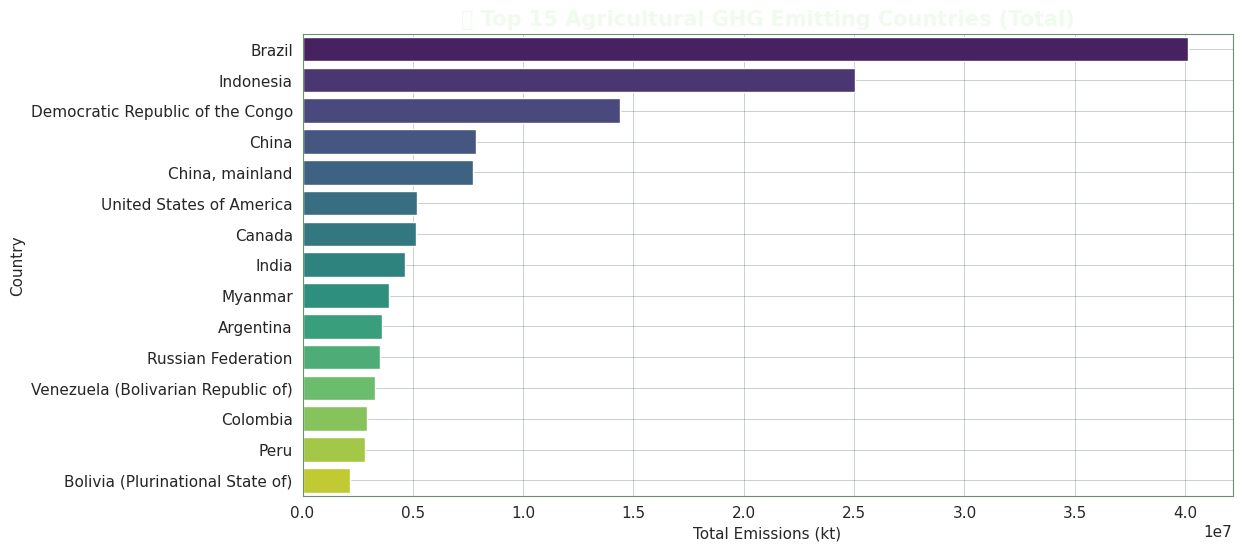

In [25]:
top_countries = (
    df.groupby("Area")["Value"]
      .sum()
      .sort_values(ascending=False)
      .head(15)
      .reset_index()
)

plt.figure(figsize=(12,6))
sns.barplot(data=top_countries, x="Value", y="Area", palette="viridis")
plt.title("🌍 Top 15 Agricultural GHG Emitting Countries (Total)")
plt.xlabel("Total Emissions (kt)")
plt.ylabel("Country")
plt.grid(True, alpha=0.3)
plt.show()

### **2. Long-term Emission Trajectories**

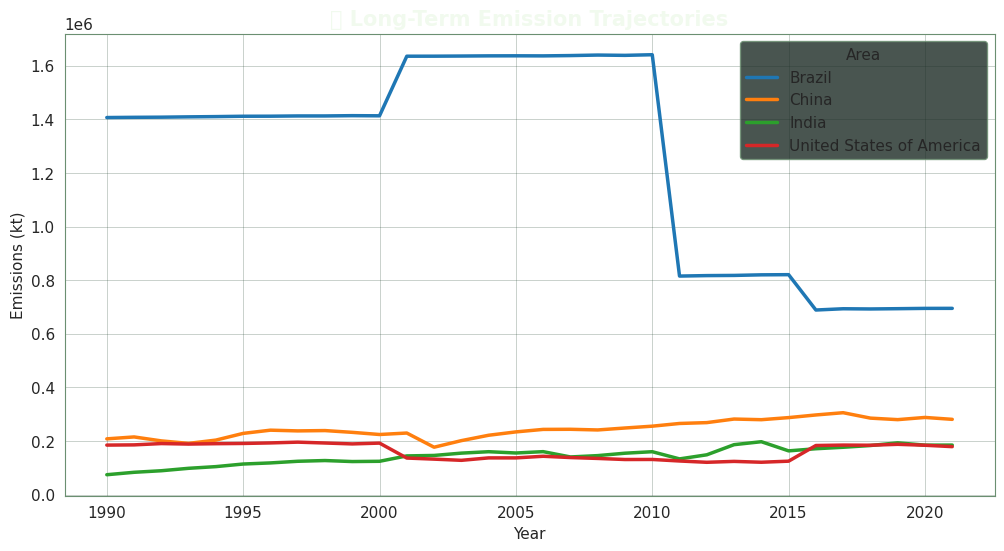

In [26]:
traj = (
    df[df["Area"].isin(selected_countries)]
    .groupby(["Year", "Area"])["Value"]
    .sum()
    .reset_index()
)

plt.figure(figsize=(12,6))
sns.lineplot(data=traj, x="Year", y="Value", hue="Area", linewidth=2.5)
plt.title("📈 Long-Term Emission Trajectories")
plt.xlabel("Year")
plt.ylabel("Emissions (kt)")
plt.grid(True, alpha=0.3)
plt.show()

### **3. EU Countries Trajectory**

In [27]:
eu_countries = df[df["Area"].str.contains(r"EU|European Union", case=False, na=False)]

# If empty, show message
if eu_countries.empty:
    print("No EU area found in dataset. Please check Area names.")
else:
    eu_traj = (
        eu_countries.groupby(["Year", "Area"])["Value"]
                    .sum()
                    .reset_index()
    )

    plt.figure(figsize=(12,6))
    sns.lineplot(data=eu_traj, x="Year", y="Value", hue="Area", legend=False)
    plt.title("🇪🇺 Emission Trajectories for EU Countries")
    plt.xlabel("Year")
    plt.ylabel("Emissions (kt)")
    plt.grid(True, alpha=0.3)
    plt.show()

No EU area found in dataset. Please check Area names.


### **4. Volatility Comparison (Stability vs Unstable)**

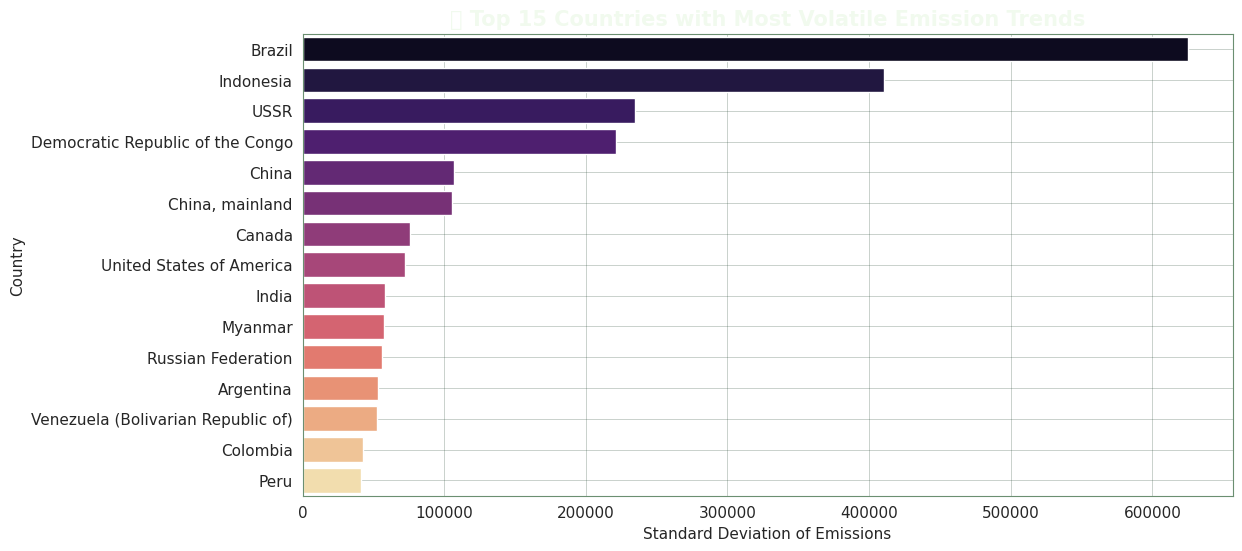

In [28]:
# Volatility = standard deviation of yearly emissions
volatility = (
    df.groupby("Area")["Value"]
      .std()
      .dropna()
      .sort_values(ascending=False)
      .head(15)
      .reset_index()
)

plt.figure(figsize=(12,6))
sns.barplot(data=volatility, x="Value", y="Area", palette="magma")
plt.title("📊 Top 15 Countries with Most Volatile Emission Trends")
plt.xlabel("Standard Deviation of Emissions")
plt.ylabel("Country")
plt.grid(True, alpha=0.3)
plt.show()

### **5. Detect Plateaus or Reversals**

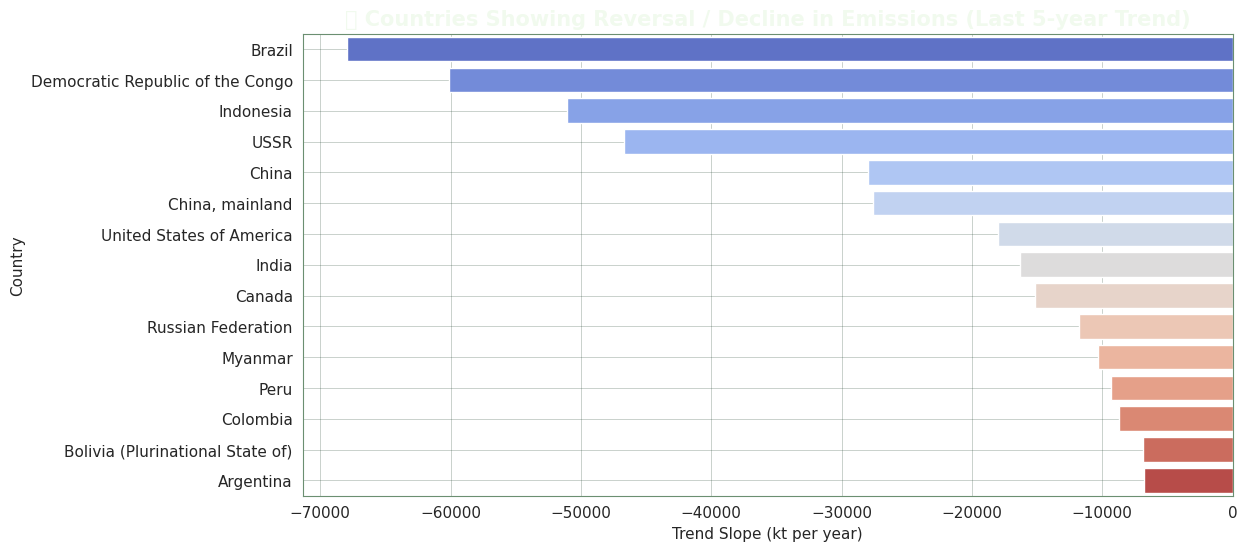

In [29]:
# Using rolling trend slope for each country
def rolling_trend_slope(group):
    group = group.sort_values("Year")
    group["Slope"] = group["Value"].rolling(window=5).apply(
        lambda x: np.polyfit(np.arange(len(x)), x, 1)[0], raw=True
    )
    return group

trend = (
    df.groupby("Area")
      .apply(rolling_trend_slope)
      .reset_index(drop=True)
)

# Top countries with last 5-year trend slope (reversal/plateau detection)
last_slope = (
    trend.dropna(subset=["Slope"])
         .groupby("Area")["Slope"]
         .last()
         .sort_values()
         .head(15)
         .reset_index()
)

plt.figure(figsize=(12,6))
sns.barplot(data=last_slope, x="Slope", y="Area", palette="coolwarm")
plt.title("🔁 Countries Showing Reversal / Decline in Emissions (Last 5-year Trend)")
plt.xlabel("Trend Slope (kt per year)")
plt.ylabel("Country")
plt.grid(True, alpha=0.3)
plt.show()

# **🌎 5️⃣ Regional & Development Pattern Insights**

### **Adding Region & Income Mapping (Required)**

### **Helper Functions**

In [30]:
def get_continent(country_name):
    try:
        country_code = pc.country_name_to_country_alpha2(country_name, cn_name_format="default")
        continent_code = pc.country_alpha2_to_continent_code(country_code)
        return pc.convert_continent_code_to_continent_name(continent_code)
    except:
        return "Unknown"

# Apply continent mapping
df["Continent"] = df["Area"].apply(get_continent)

# -------------------------
# Income Level Mapping (manual)
# -------------------------
# (World Bank Income Groups)
low_income = ["Afghanistan", "Ethiopia", "Haiti", "Nepal", "Mozambique"]  # example
lower_middle = ["India", "Pakistan", "Bangladesh"]
upper_middle = ["China", "Brazil", "Turkey", "South Africa"]
high_income = ["United States of America", "Canada", "United Kingdom", "Germany", "France"]

def income_group(area):
    if area in low_income:
        return "Low income"
    elif area in lower_middle:
        return "Lower middle income"
    elif area in upper_middle:
        return "Upper middle income"
    elif area in high_income:
        return "High income"
    else:
        return "Other"

df["Income Level"] = df["Area"].apply(income_group)

df.head()

Domain Code            Domain  Area Code (M49)         Area  Element Code  \
0          GT  Emissions totals                4  Afghanistan          7225   
1          GT  Emissions totals                4  Afghanistan          7225   
2          GT  Emissions totals                4  Afghanistan          7225   
3          GT  Emissions totals                4  Afghanistan          7225   
4          GT  Emissions totals                4  Afghanistan          7225   

           Element  Item Code                            Item  Year Code  \
0  Emissions (CH4)       6995  Emissions on agricultural land       1990   
1  Emissions (CH4)       6995  Emissions on agricultural land       1991   
2  Emissions (CH4)       6995  Emissions on agricultural land       1992   
3  Emissions (CH4)       6995  Emissions on agricultural land       1993   
4  Emissions (CH4)       6995  Emissions on agricultural land       1994   

   Year  Source Code      Source Unit     Value Flag Flag Description  Note  \
0  1990         3050  FAO TIER 1   kt  214.4467    E  Estimated value   NaN   
1  1991         3050  FAO TIER 1   kt  224.1393    E  Estimated value   NaN   
2  1992         3050  FAO TIER 1   kt  226.7224    E  Estimated value   NaN   
3  1993         3050  FAO TIER 1   kt  228.5003    E  Estimated value   NaN   
4  1994         3050  FAO TIER 1   kt  236.9822    E  Estimated value   NaN   

  Continent Income Level  
0      Asia   Low income  
1      Asia   Low income  
2      Asia   Low income  
3      Asia   Low income  
4      Asia   Low income

### **1. Regional Emissions Comparison (Stacked Area)**

<Figure size 1400x600 with 0 Axes>

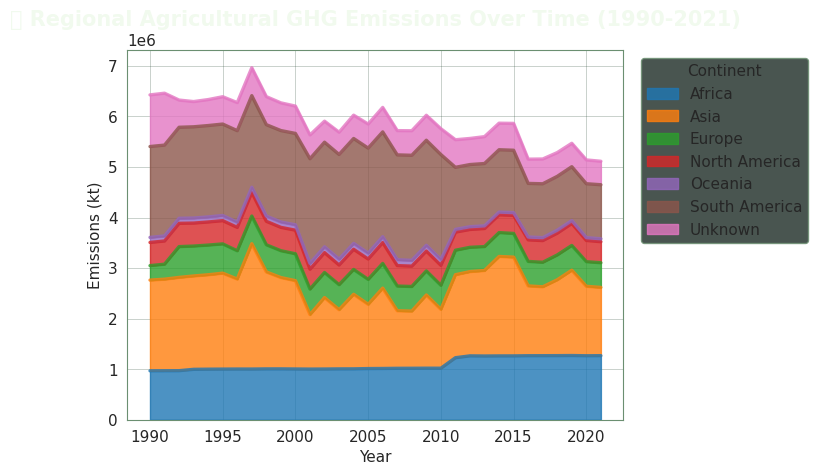

In [31]:
regional_emissions = (
    df.groupby(["Year", "Continent"])["Value"]
      .sum()
      .reset_index()
)

pivot_regional = regional_emissions.pivot(index="Year", columns="Continent", values="Value").fillna(0)

plt.figure(figsize=(14,6))
pivot_regional.plot.area(alpha=0.8)
plt.title("🌍 Regional Agricultural GHG Emissions Over Time (1990-2021)")
plt.xlabel("Year")
plt.ylabel("Emissions (kt)")
plt.grid(True, alpha=0.3)
plt.legend(title="Continent", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.show()

### **2. Regional Growth Rate Comparison (YoY %)**

<Figure size 1400x600 with 0 Axes>

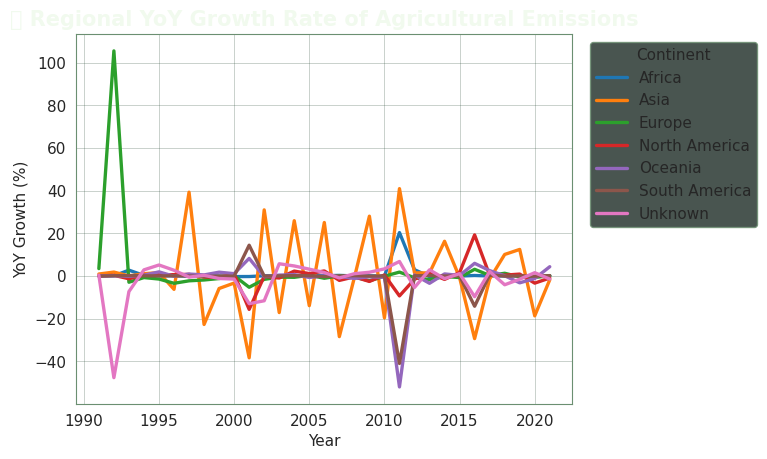

In [32]:
regional_growth = pivot_regional.pct_change().dropna() * 100

plt.figure(figsize=(14,6))
regional_growth.plot()
plt.title("📈 Regional YoY Growth Rate of Agricultural Emissions")
plt.xlabel("Year")
plt.ylabel("YoY Growth (%)")
plt.grid(True, alpha=0.3)
plt.legend(title="Continent", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.show()

### **3. Developing vs Developed Emissions (Line Plot)**

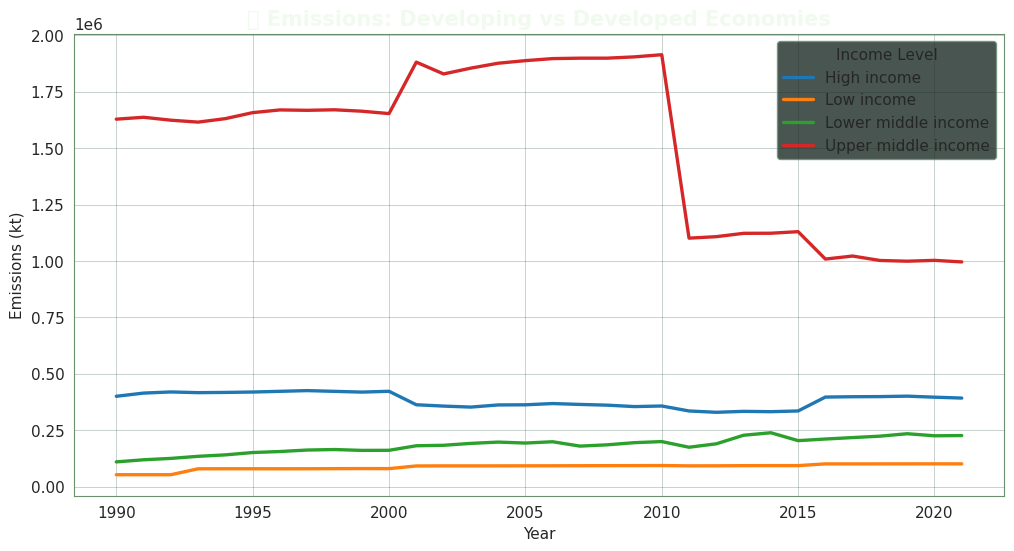

In [33]:
dev_emissions = (
    df[df["Income Level"] != "Other"]
    .groupby(["Year", "Income Level"])["Value"]
    .sum()
    .reset_index()
)

plt.figure(figsize=(12,6))
sns.lineplot(data=dev_emissions, x="Year", y="Value", hue="Income Level")
plt.title("🌍 Emissions: Developing vs Developed Economies")
plt.xlabel("Year")
plt.ylabel("Emissions (kt)")
plt.grid(True, alpha=0.3)
plt.show()

### **4. Regional Hotspots (Top 10 Emitters by Continent)**

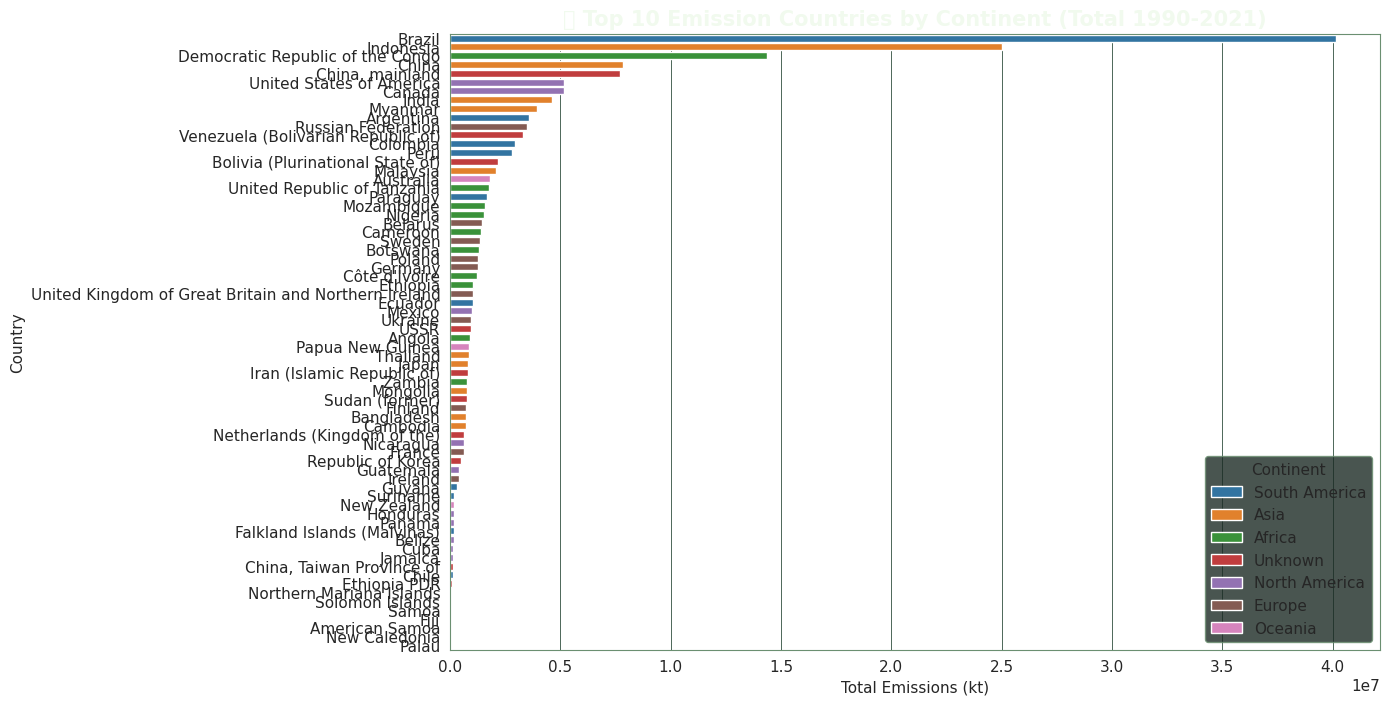

In [34]:
top_countries = (
    df.groupby(["Continent", "Area"])["Value"]
      .sum()
      .reset_index()
      .sort_values("Value", ascending=False)
)

top10 = top_countries.groupby("Continent").head(10)

plt.figure(figsize=(12,8))
sns.barplot(data=top10, x="Value", y="Area", hue="Continent", dodge=False)
plt.title("🔥 Top 10 Emission Countries by Continent (Total 1990-2021)")
plt.xlabel("Total Emissions (kt)")
plt.ylabel("Country")
plt.legend(title="Continent")
plt.show()

### **5. Convergence/Divergence Analysis (Ratio Plot)**

<Figure size 1400x600 with 0 Axes>

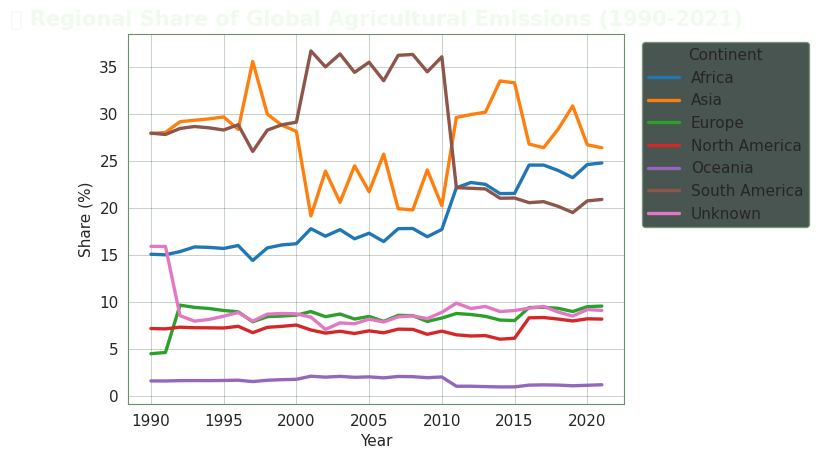

In [35]:
# Global total
global_total = df.groupby("Year")["Value"].sum()

# Region ratio
region_ratio = pivot_regional.div(global_total, axis=0) * 100

plt.figure(figsize=(14,6))
region_ratio.plot()
plt.title("📌 Regional Share of Global Agricultural Emissions (1990-2021)")
plt.xlabel("Year")
plt.ylabel("Share (%)")
plt.grid(True, alpha=0.3)
plt.legend(title="Continent", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.show()

# **📉 6️⃣ Temporal Trend & Structural Change Detection**

### **1. Global Trend + Yearly Change (YoY)**

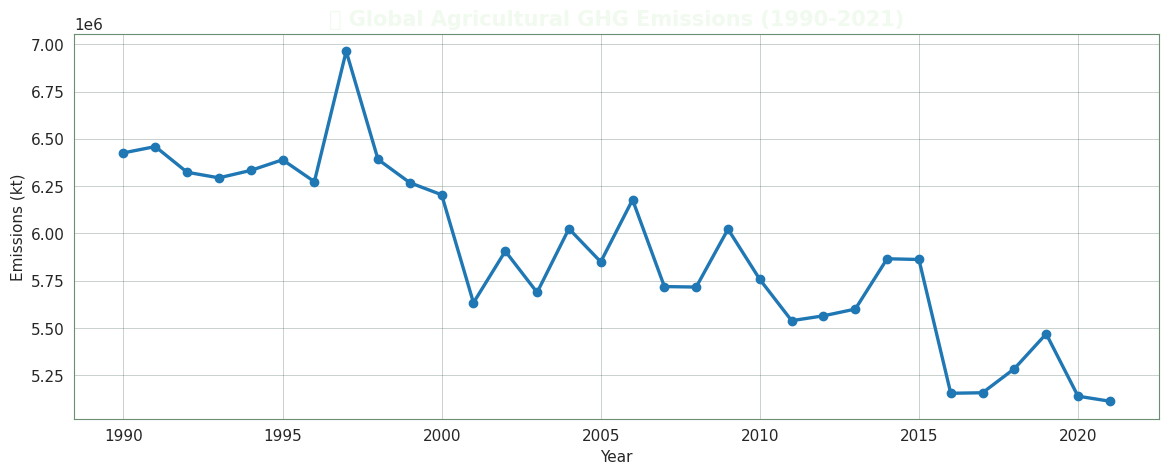

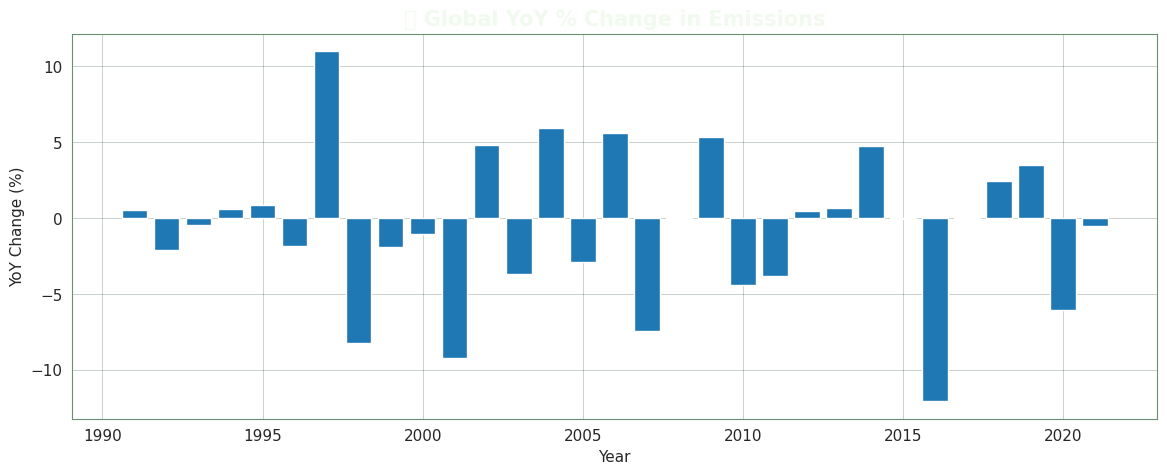

In [36]:
global_total = df.groupby("Year")["Value"].sum()
global_yoy = global_total.pct_change() * 100

plt.figure(figsize=(14,5))
plt.plot(global_total.index, global_total.values, marker="o")
plt.title("🌍 Global Agricultural GHG Emissions (1990-2021)")
plt.xlabel("Year")
plt.ylabel("Emissions (kt)")
plt.grid(True, alpha=0.3)
plt.show()

plt.figure(figsize=(14,5))
plt.bar(global_yoy.index, global_yoy.values)
plt.title("📉 Global YoY % Change in Emissions")
plt.xlabel("Year")
plt.ylabel("YoY Change (%)")
plt.grid(True, alpha=0.3)
plt.show()

### **2. Detect Structural Breaks (Changepoint-like Plot)**

**This uses rolling mean + rolling std to detect abnormal jumps.**

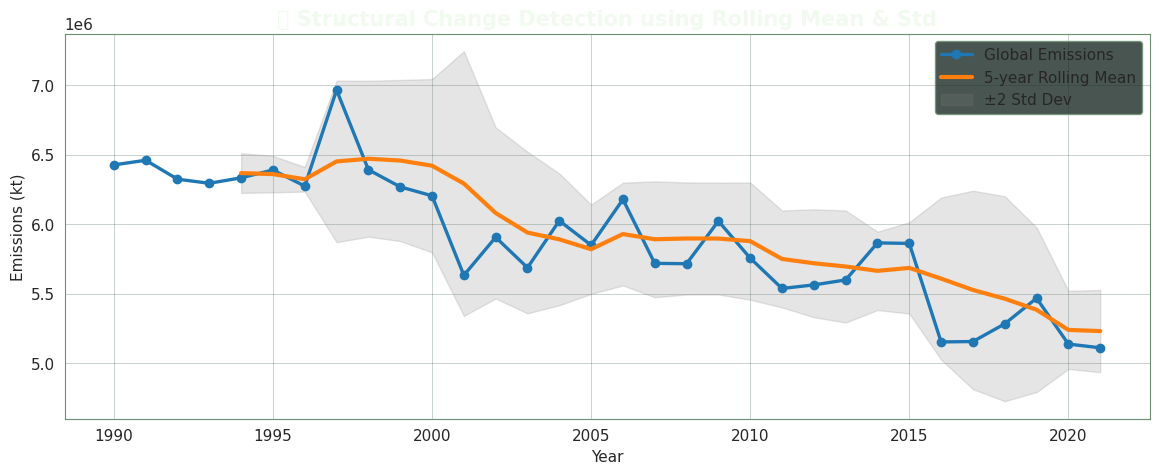

In [37]:
rolling_mean = global_total.rolling(window=5).mean()
rolling_std = global_total.rolling(window=5).std()

plt.figure(figsize=(14,5))
plt.plot(global_total.index, global_total.values, label="Global Emissions", marker="o")
plt.plot(rolling_mean.index, rolling_mean.values, label="5-year Rolling Mean", linewidth=3)
plt.fill_between(
    rolling_mean.index,
    rolling_mean - 2*rolling_std,
    rolling_mean + 2*rolling_std,
    color="grey",
    alpha=0.2,
    label="±2 Std Dev"
)

plt.title("🔍 Structural Change Detection using Rolling Mean & Std")
plt.xlabel("Year")
plt.ylabel("Emissions (kt)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### **3. Pre-2000 vs Post-2000 Comparison**

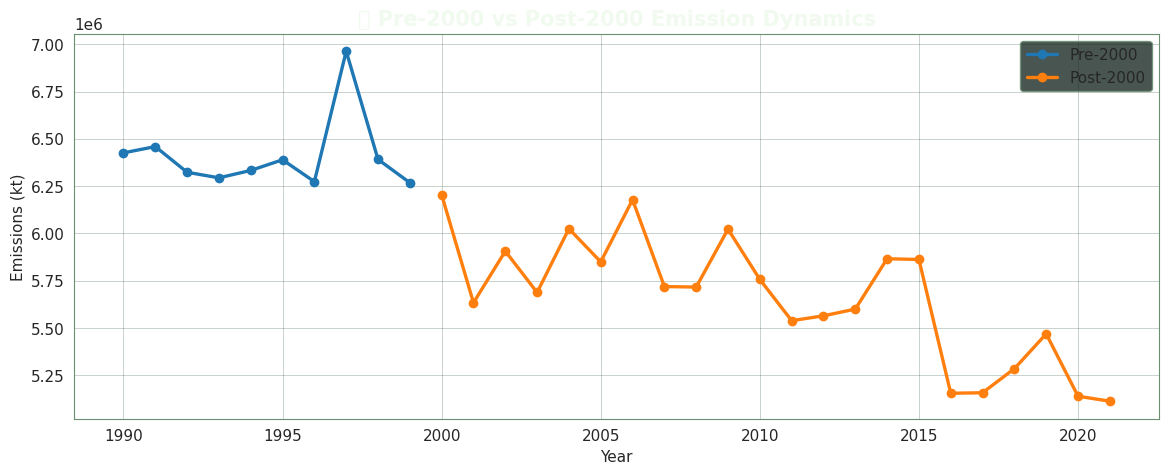

In [38]:
pre2000 = df[df["Year"] < 2000].groupby("Year")["Value"].sum()
post2000 = df[df["Year"] >= 2000].groupby("Year")["Value"].sum()

plt.figure(figsize=(14,5))
plt.plot(pre2000.index, pre2000.values, label="Pre-2000", marker="o")
plt.plot(post2000.index, post2000.values, label="Post-2000", marker="o")
plt.title("📌 Pre-2000 vs Post-2000 Emission Dynamics")
plt.xlabel("Year")
plt.ylabel("Emissions (kt)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### **4. Volatility by Country (Standard Deviation)**

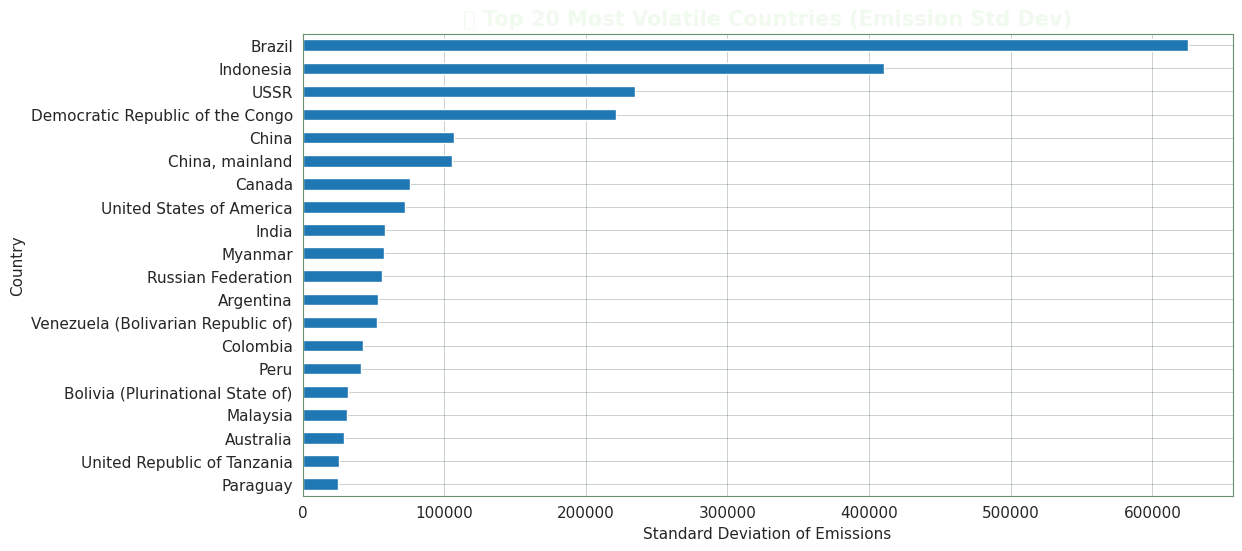

In [39]:
country_volatility = (
    df.groupby("Area")["Value"]
      .std()
      .sort_values(ascending=False)
      .head(20)
)

plt.figure(figsize=(12,6))
country_volatility.plot(kind="barh")
plt.title("📈 Top 20 Most Volatile Countries (Emission Std Dev)")
plt.xlabel("Standard Deviation of Emissions")
plt.ylabel("Country")
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3)
plt.show()

### **5. Volatility by Gas Type (CH4, CO2, N2O)**

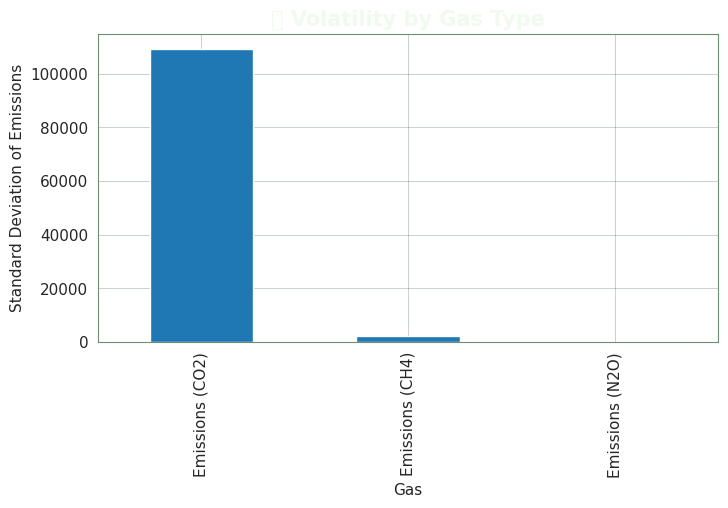

In [40]:
gas_volatility = (
    df.groupby("Element")["Value"]
      .std()
      .sort_values(ascending=False)
)

plt.figure(figsize=(8,4))
gas_volatility.plot(kind="bar")
plt.title("📌 Volatility by Gas Type")
plt.xlabel("Gas")
plt.ylabel("Standard Deviation of Emissions")
plt.grid(True, alpha=0.3)
plt.show()

### **6. Abnormal Jumps Detection (Top Years)**

In [41]:
global_diff = global_total.diff()
top_jumps = global_diff.nlargest(5)
top_drops = global_diff.nsmallest(5)

print("Top 5 Jumps:", top_jumps)
print("Top 5 Drops:", top_drops)

Top 5 Jumps: Year
1997    689615.3060
2004    337056.0961
2006    328575.0658
2009    306164.1755
2002    272833.4359
Name: Value, dtype: float64
Top 5 Drops: Year
2016   -707268.5802
1998   -572013.9944
2001   -570807.5258
2007   -459119.7946
2020   -329545.8557
Name: Value, dtype: float64


# **🔄 7️⃣ Growth Rate & Dynamics Analysis**

### **1. YoY Growth by Gas (Global)**

<Figure size 1400x600 with 0 Axes>

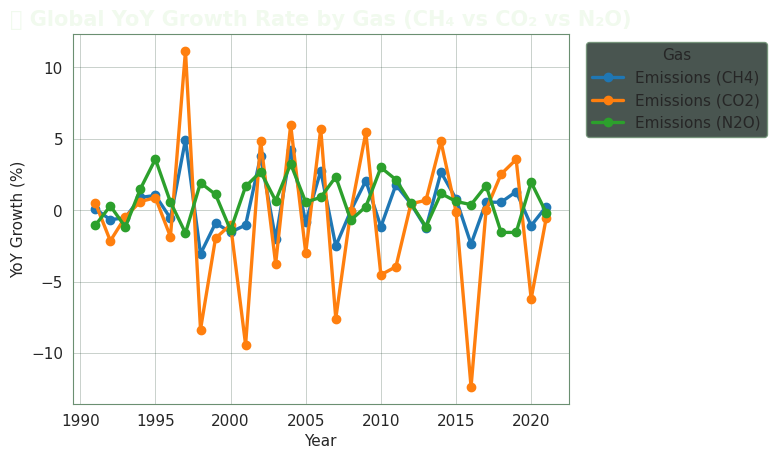

In [42]:
gas_global = df.groupby(["Year", "Element"])["Value"].sum().unstack()
gas_yoy = gas_global.pct_change() * 100

plt.figure(figsize=(14,6))
gas_yoy.plot(marker="o")
plt.title("📈 Global YoY Growth Rate by Gas (CH₄ vs CO₂ vs N₂O)")
plt.xlabel("Year")
plt.ylabel("YoY Growth (%)")
plt.grid(True, alpha=0.3)
plt.legend(title="Gas", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.show()

### **2. Countries with Fastest Acceleration (Last 5 Years)**

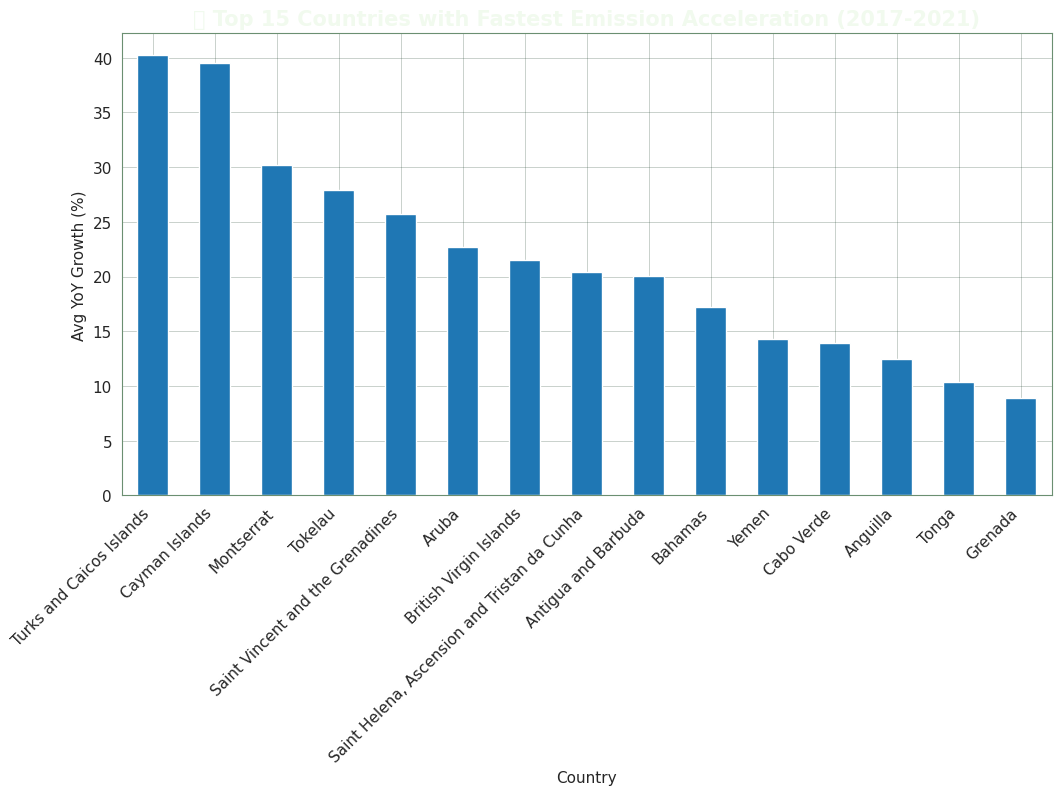

In [43]:
recent = df[df["Year"] >= 2017]

country_growth = (
    recent.groupby(["Area", "Year"])["Value"]
          .sum()
          .groupby(level=0)
          .apply(lambda x: x.pct_change().mean() * 100)
          .dropna()
          .sort_values(ascending=False)
          .head(15)
)

plt.figure(figsize=(12,6))
country_growth.plot(kind="bar")
plt.title("🚀 Top 15 Countries with Fastest Emission Acceleration (2017-2021)")
plt.xlabel("Country")
plt.ylabel("Avg YoY Growth (%)")
plt.xticks(rotation=45, ha="right")
plt.grid(True, alpha=0.3)
plt.show()

### **3. Countries with Consistent Decline**

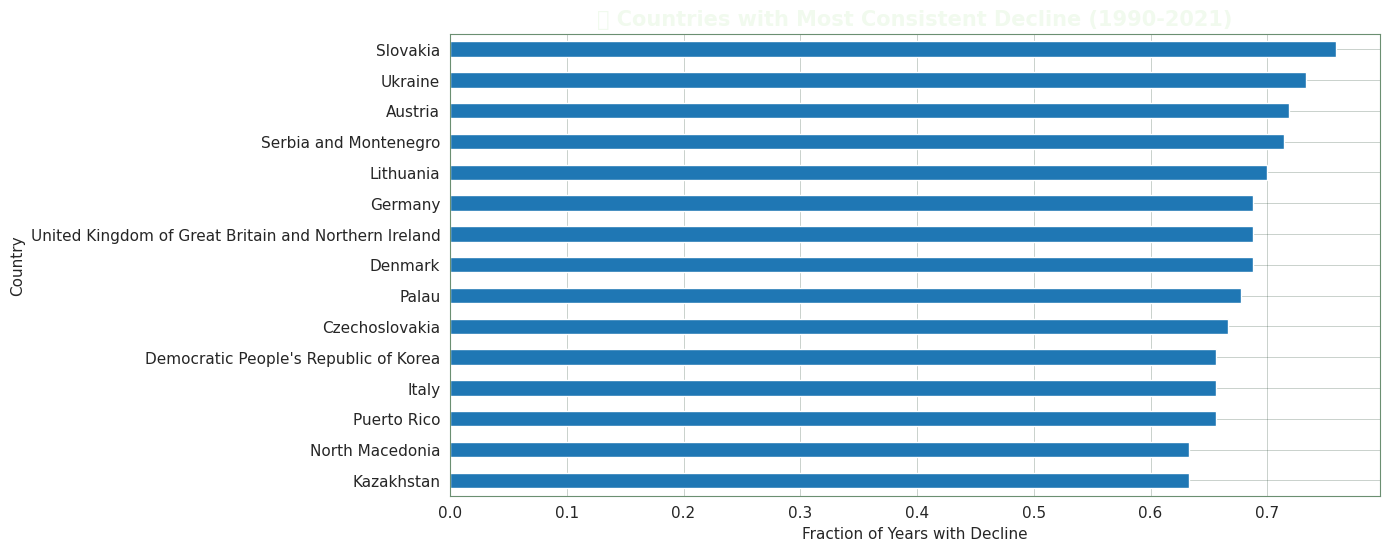

In [44]:
country_decline = (
    df.groupby(["Area", "Year"])["Value"]
      .sum()
      .groupby(level=0)
      .apply(lambda x: (x.pct_change() < 0).mean())
      .sort_values(ascending=False)
      .head(15)
)

plt.figure(figsize=(12,6))
country_decline.plot(kind="barh")
plt.title("📉 Countries with Most Consistent Decline (1990-2021)")
plt.xlabel("Fraction of Years with Decline")
plt.ylabel("Country")
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3)
plt.show()

### **4. High Growth but Low Base (Fastest Growing Small Emitters)**

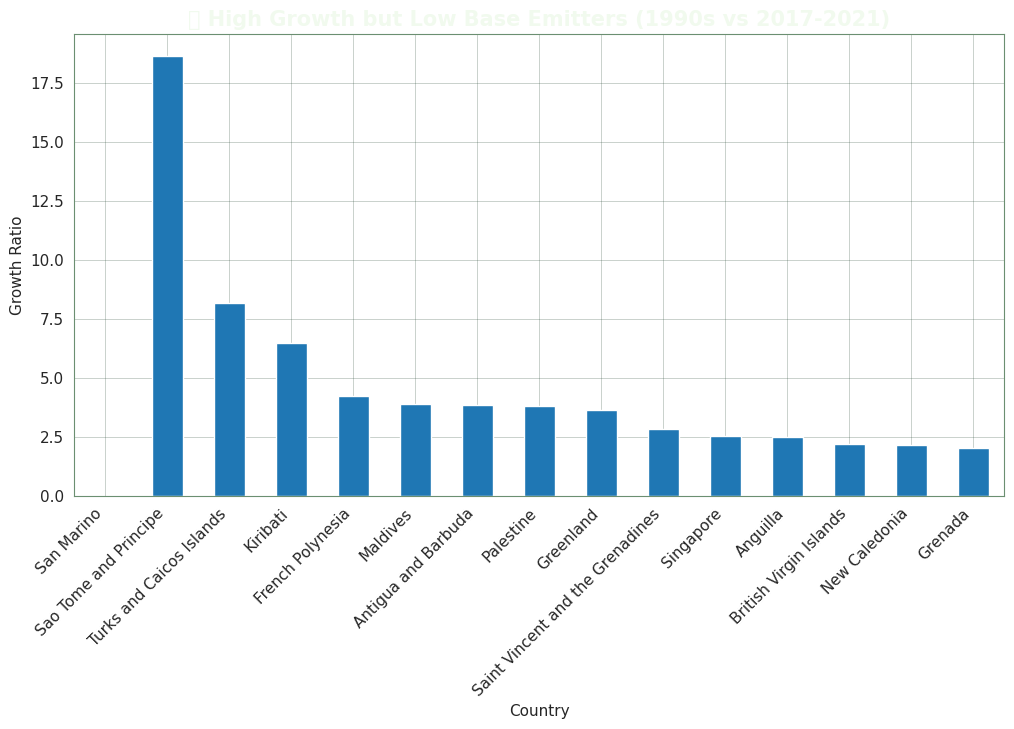

In [45]:
# Base emissions (1990 average)
base = df[df["Year"] <= 1995].groupby("Area")["Value"].mean()

# Recent emissions (2017-2021 average)
recent = df[df["Year"] >= 2017].groupby("Area")["Value"].mean()

growth_ratio = ((recent - base) / base).dropna().sort_values(ascending=False)

top_high_growth_low_base = growth_ratio[base < base.quantile(0.25)].head(15)

plt.figure(figsize=(12,6))
top_high_growth_low_base.plot(kind="bar")
plt.title("🔥 High Growth but Low Base Emitters (1990s vs 2017-2021)")
plt.xlabel("Country")
plt.ylabel("Growth Ratio")
plt.xticks(rotation=45, ha="right")
plt.grid(True, alpha=0.3)
plt.show()

### **5. Stability vs Instability (Coefficient of Variation)**

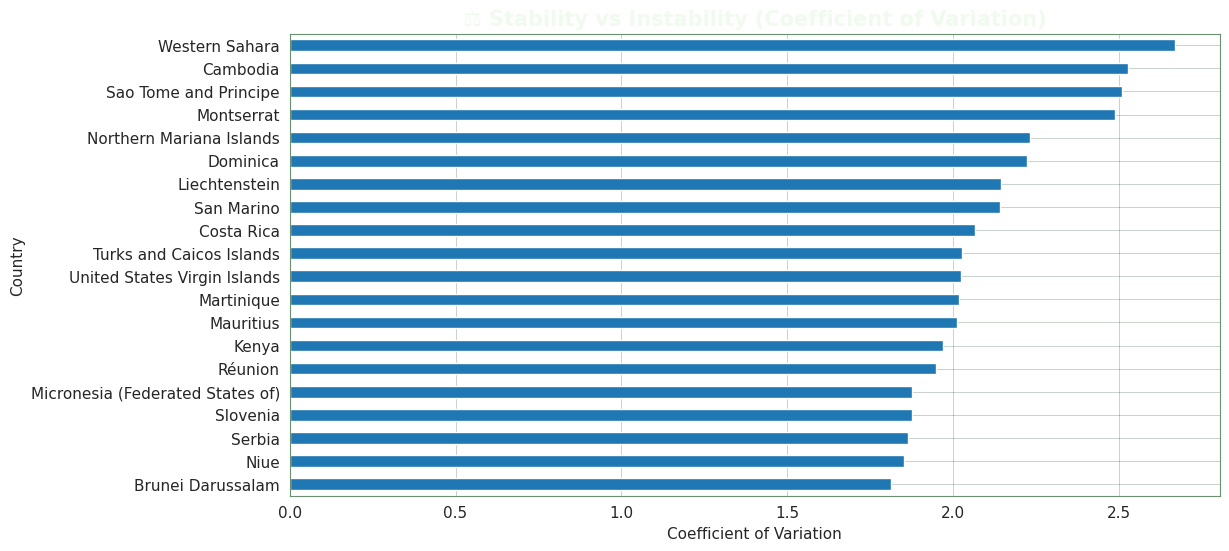

In [46]:
country_cv = (
    df.groupby("Area")["Value"]
      .agg(["mean", "std"])
      .assign(CV=lambda x: x["std"] / x["mean"])
      .sort_values("CV", ascending=False)
      .head(20)
)

plt.figure(figsize=(12,6))
country_cv["CV"].plot(kind="barh")
plt.title("⚖️ Stability vs Instability (Coefficient of Variation)")
plt.xlabel("Coefficient of Variation")
plt.ylabel("Country")
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3)
plt.show()

# **⚠️ 8️⃣ Anomaly & Outlier Detection**

### **1. Global Spike Detection (Z-score)**

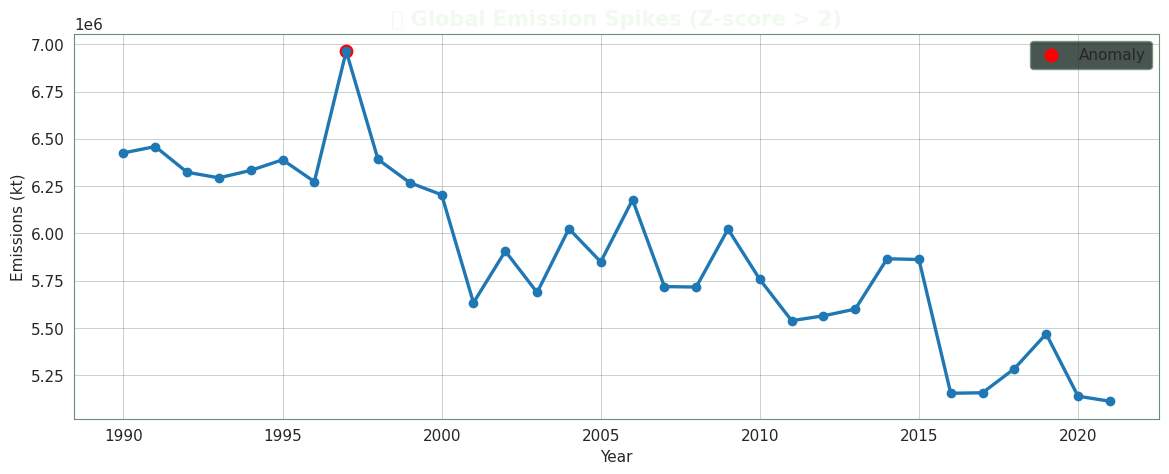

Global Anomaly Years: [1997]


In [47]:
global_total = df.groupby("Year")["Value"].sum()
z_score = (global_total - global_total.mean()) / global_total.std()

# Identify spikes
spikes = z_score[abs(z_score) > 2]

plt.figure(figsize=(14,5))
plt.plot(global_total.index, global_total.values, marker="o")
plt.scatter(spikes.index, global_total.loc[spikes.index], color="red", s=80, label="Anomaly")
plt.title("🌍 Global Emission Spikes (Z-score > 2)")
plt.xlabel("Year")
plt.ylabel("Emissions (kt)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("Global Anomaly Years:", list(spikes.index))

### **2. Country-Level Spike Detection (Top 20 Anomalies)**

In [48]:
country_anomalies = []

for country in df["Area"].unique():
    temp = df[df["Area"] == country].groupby("Year")["Value"].sum()
    z = (temp - temp.mean()) / temp.std()
    spikes = z[abs(z) > 3]  # stricter threshold
    if len(spikes) > 0:
        for year in spikes.index:
            country_anomalies.append((country, year, temp.loc[year], z.loc[year]))

country_anomalies = pd.DataFrame(country_anomalies, columns=["Country", "Year", "Value", "Z-score"])
country_anomalies = country_anomalies.sort_values("Z-score", ascending=False).head(20)

country_anomalies

Country  Year       Value   Z-score
25                                        Tuvalu  1998      1.5315  4.821633
7                                 Cayman Islands  2021     32.3619  4.486083
19                                       Nigeria  2021  49893.0977  4.428801
6                              Brunei Darussalam  1998   4484.3733  4.362611
24                      Turks and Caicos Islands  2021     25.6176  4.250062
23                                       Tokelau  2021      0.0463  4.192128
14                                    Kyrgyzstan  1992   1243.4710  3.893875
5                                       Botswana  2011  42055.4666  3.669451
20                               North Macedonia  1994    766.2430  3.638174
1                                        Armenia  1992    819.3097  3.604461
11                                       Georgia  1992   1508.4899  3.570569
0                            Antigua and Barbuda  2021     81.6378  3.500189
21  Saint Helena, Ascension and Tristan da Cunha  2016      0.6886  3.424203
13                                       Hungary  1990   9801.4229  3.399954
4                                       Barbados  1990     34.2111  3.399697
2                                          Aruba  2021     57.2281  3.368584
8                                   Cook Islands  1998      8.6386  3.348703
9                                        Czechia  1995   4996.9757  3.228029
18                                         Nauru  1998     23.5833  3.163228
26                                       Ukraine  1992  51557.0256  3.140973

### **3. Gas-Specific Outliers (Boxplot)**

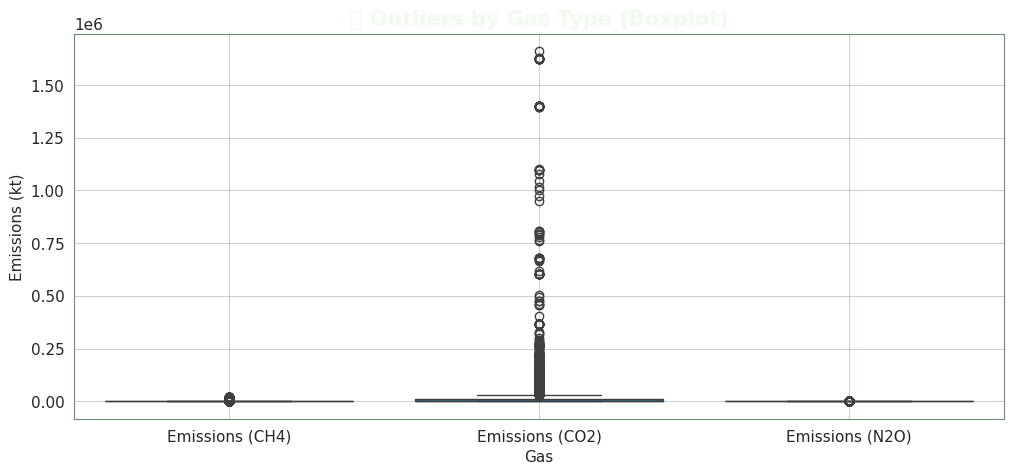

In [49]:
plt.figure(figsize=(12,5))
sns.boxplot(data=df, x="Element", y="Value")
plt.title("📌 Outliers by Gas Type (Boxplot)")
plt.xlabel("Gas")
plt.ylabel("Emissions (kt)")
plt.grid(True, alpha=0.3)
plt.show()

### **4. Synchronized Global Anomalies (Multi-Gas Z-score)**

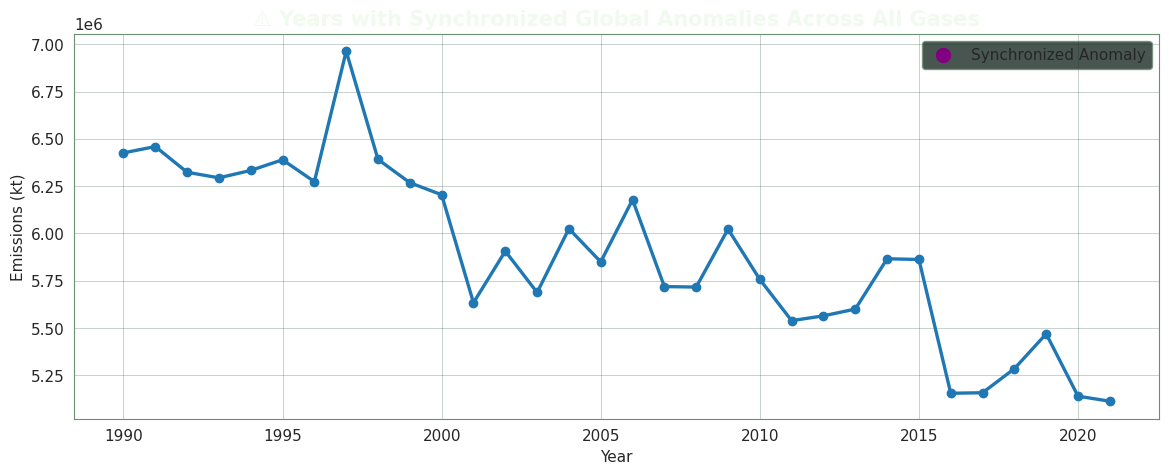

Synchronized anomaly years: []


In [50]:
gas_yearly = df.groupby(["Year", "Element"])["Value"].sum().unstack()
gas_z = (gas_yearly - gas_yearly.mean()) / gas_yearly.std()

# Count years where all gases are abnormal
synch_anomalies = gas_z[(abs(gas_z) > 2).all(axis=1)]

plt.figure(figsize=(14,5))
plt.plot(global_total.index, global_total.values, marker="o")
plt.scatter(synch_anomalies.index, global_total.loc[synch_anomalies.index], color="purple", s=100, label="Synchronized Anomaly")
plt.title("⚠️ Years with Synchronized Global Anomalies Across All Gases")
plt.xlabel("Year")
plt.ylabel("Emissions (kt)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("Synchronized anomaly years:", list(synch_anomalies.index))

### **5. Anomalies vs Data Flags (E = Estimated)**

In [51]:
anomaly_years = list(spikes.index)

flag_analysis = (
    df[df["Year"].isin(anomaly_years)]
    .groupby(["Year", "Flag"])["Value"]
    .count()
    .unstack(fill_value=0)
)

# If empty, print message
if flag_analysis.empty:
    print("No anomaly years detected or no records in anomaly years.")
else:
    # Convert to numeric
    flag_analysis = flag_analysis.apply(pd.to_numeric, errors="coerce").fillna(0)

    # Plot stacked bar
    flag_analysis.plot(kind="bar", stacked=True, figsize=(14,5))
    plt.title("📌 Data Flags During Anomaly Years (Stacked)")
    plt.xlabel("Year")
    plt.ylabel("Record Count")
    plt.grid(True, alpha=0.3)
    plt.show()

No anomaly years detected or no records in anomaly years.


# **🔮 9️⃣ Time-Series Readiness & Forecast Signals**

### **1. Trend Strength by Country (Using Rolling Slope)**

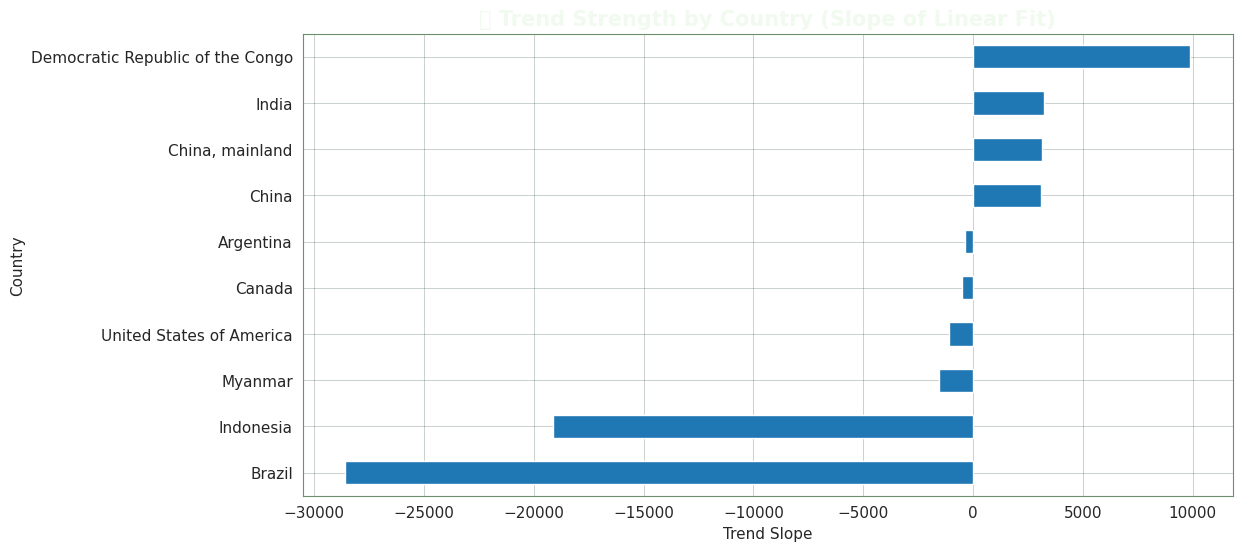

In [52]:
# Choose top countries by total emissions
top_countries = df.groupby("Area")["Value"].sum().sort_values(ascending=False).head(10).index

trend_scores = {}

for country in top_countries:
    ts = df[df["Area"] == country].groupby("Year")["Value"].sum()
    x = np.arange(len(ts))
    slope = np.polyfit(x, ts.values, 1)[0]  # slope
    trend_scores[country] = slope

trend_df = pd.Series(trend_scores).sort_values()

plt.figure(figsize=(12,6))
trend_df.plot(kind="barh")
plt.title("📈 Trend Strength by Country (Slope of Linear Fit)")
plt.xlabel("Trend Slope")
plt.ylabel("Country")
plt.grid(True, alpha=0.3)
plt.show()

### **2. Trend Strength by Gas**

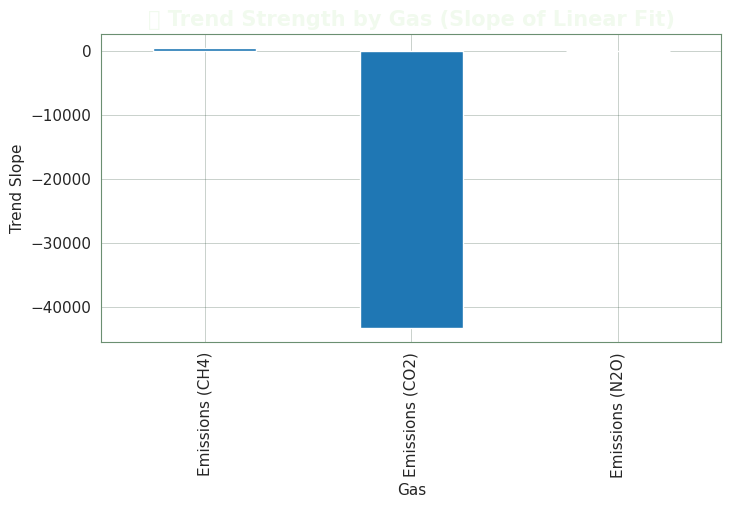

In [53]:
gas_trend = {}

for gas in df["Element"].unique():
    ts = df[df["Element"] == gas].groupby("Year")["Value"].sum()
    x = np.arange(len(ts))
    slope = np.polyfit(x, ts.values, 1)[0]
    gas_trend[gas] = slope

pd.Series(gas_trend).plot(kind="bar", figsize=(8,4))
plt.title("📌 Trend Strength by Gas (Slope of Linear Fit)")
plt.xlabel("Gas")
plt.ylabel("Trend Slope")
plt.grid(True, alpha=0.3)
plt.show()

### **3. Stationarity Check (ADF Test) by Gas**

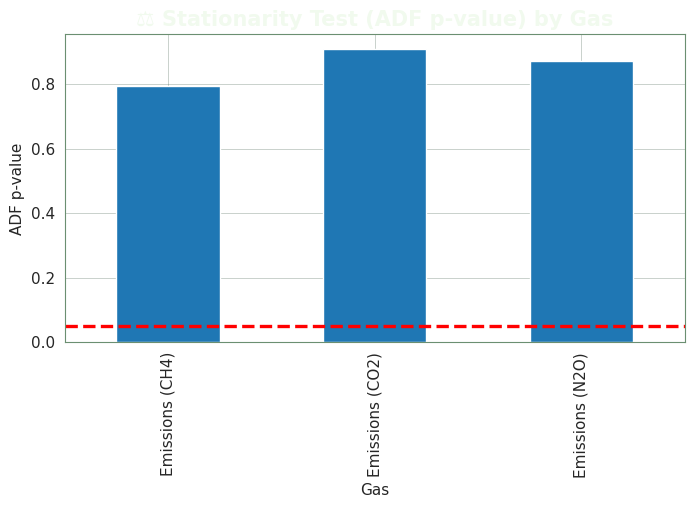

In [54]:
from statsmodels.tsa.stattools import adfuller

def adf_test(ts):
    result = adfuller(ts)
    return result[1]  # p-value

gas_adf = {}
for gas in df["Element"].unique():
    ts = df[df["Element"] == gas].groupby("Year")["Value"].sum()
    gas_adf[gas] = adf_test(ts)

pd.Series(gas_adf).plot(kind="bar", figsize=(8,4))
plt.axhline(0.05, color="red", linestyle="--")
plt.title("⚖️ Stationarity Test (ADF p-value) by Gas")
plt.xlabel("Gas")
plt.ylabel("ADF p-value")
plt.grid(True, alpha=0.3)
plt.show()

### **4. Stationarity by Country (Top 10 Countries)**

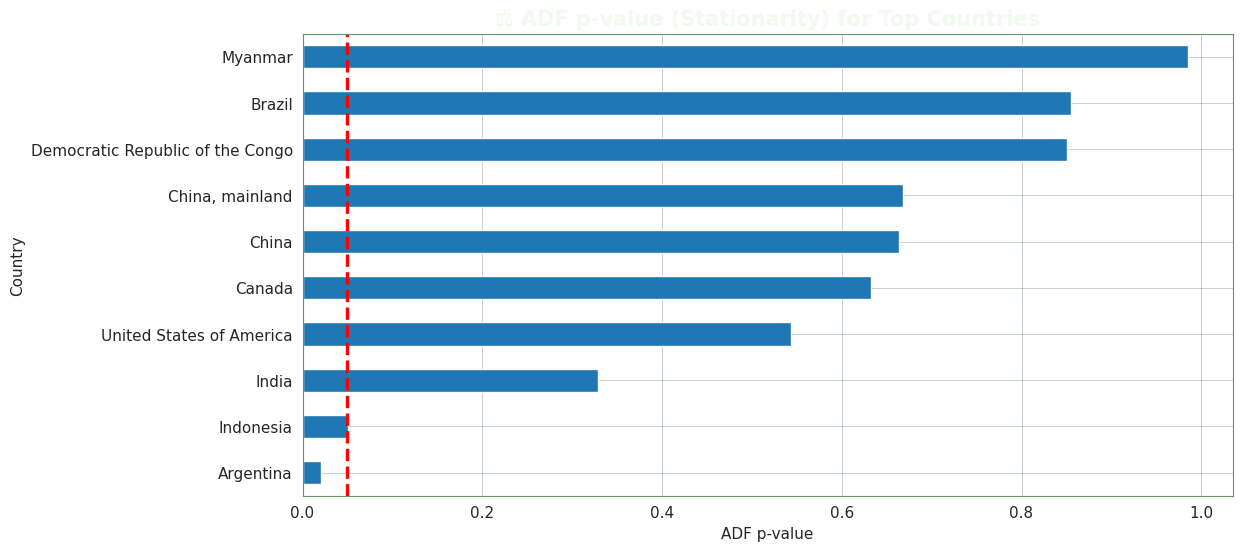

In [55]:
from statsmodels.tsa.stattools import adfuller

adf_scores = {}
for country in top_countries:
    ts = df[df["Area"] == country].groupby("Year")["Value"].sum()
    adf_scores[country] = adfuller(ts)[1]

pd.Series(adf_scores).sort_values().plot(kind="barh", figsize=(12,6))
plt.axvline(0.05, color="red", linestyle="--")
plt.title("⚖️ ADF p-value (Stationarity) for Top Countries")
plt.xlabel("ADF p-value")
plt.ylabel("Country")
plt.grid(True, alpha=0.3)
plt.show()

### **5. Seasonality / Cyclic Patterns (ACF Plot)**

In [56]:
from statsmodels.graphics.tsaplots import plot_acf

ts_world = (
    df[df["Area"] == "World"]
    .groupby("Year")["Value"]
    .sum()
    .sort_index()
)

# 🔍 Check if we have enough data
if len(ts_world) < 2:
    print("❌ Not enough data to plot ACF. Length =", len(ts_world))
else:
    max_lags = min(10, len(ts_world) - 1)
    plt.figure(figsize=(12,4))
    plot_acf(ts_world, lags=max_lags)
    plt.title("🔁 Autocorrelation (ACF) - World Emissions")
    plt.show()

❌ Not enough data to plot ACF. Length = 0


### **6. Forecast Readiness Score (Simple Heuristic)**

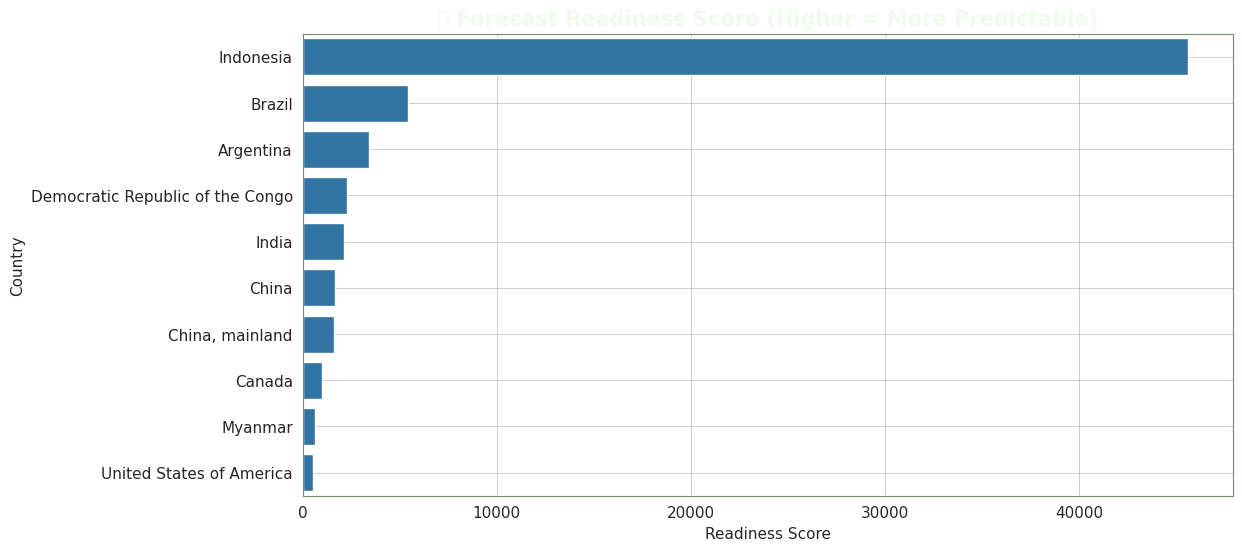

In [57]:
readiness = []

for country in top_countries:
    ts = df[df["Area"] == country].groupby("Year")["Value"].sum()
    slope = np.polyfit(np.arange(len(ts)), ts.values, 1)[0]
    pval = adfuller(ts)[1]
    cv = ts.std() / ts.mean()

    score = (abs(slope) / (cv + 0.001)) * (0.05 / pval)  # higher = more predictable
    readiness.append((country, score))

readiness_df = pd.DataFrame(readiness, columns=["Country", "Forecast_Readiness"])
readiness_df = readiness_df.sort_values("Forecast_Readiness", ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(data=readiness_df, x="Forecast_Readiness", y="Country")
plt.title("🔮 Forecast Readiness Score (Higher = More Predictable)")
plt.xlabel("Readiness Score")
plt.ylabel("Country")
plt.grid(True, alpha=0.3)
plt.show()

# **🧠 🔟 Policy-Relevant Insights**

### **1. Countries with Declining Emissions Despite Economic Growth**

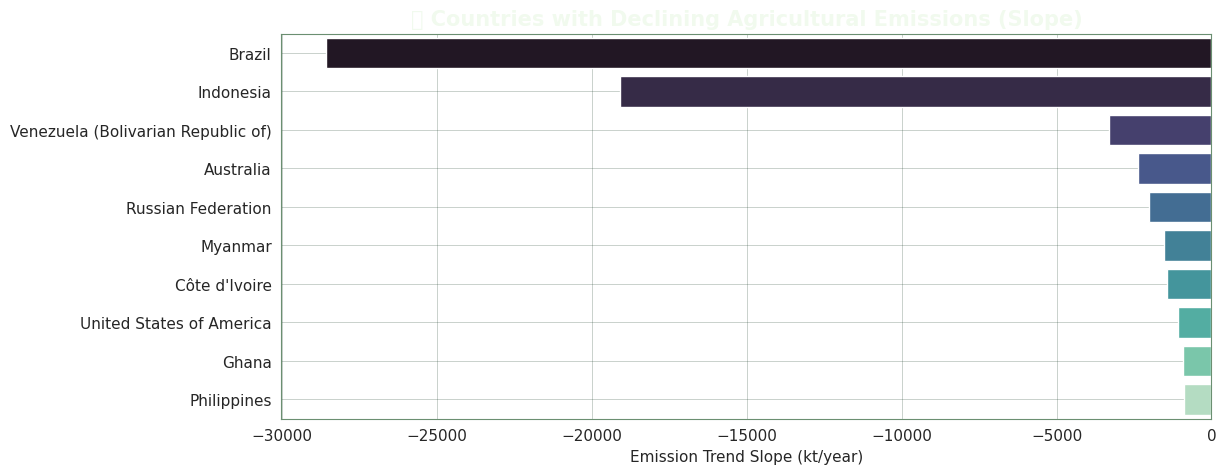

In [58]:
from sklearn.linear_model import LinearRegression

# ----------------------------
# Prepare country-level trend slopes
# ----------------------------
country_trends = (
    df.groupby(["Area", "Year"])["Value"]
      .sum()
      .reset_index()
)

# compute slope using linear regression per country
slopes = []
for country, g in country_trends.groupby("Area"):
    X = g["Year"].values.reshape(-1, 1)
    y = g["Value"].values
    if len(X) < 5:
        continue
    model = LinearRegression().fit(X, y)
    slopes.append([country, model.coef_[0], y[-1] - y[0]])

slopes_df = pd.DataFrame(slopes, columns=["Country", "Slope", "TotalChange"])
slopes_df = slopes_df.sort_values("Slope")

# top declining countries (lowest slope)
decliners = slopes_df.head(10)

plt.figure(figsize=(12,5))
sns.barplot(data=decliners, x="Slope", y="Country", palette="mako")
plt.title("📉 Countries with Declining Agricultural Emissions (Slope)")
plt.xlabel("Emission Trend Slope (kt/year)")
plt.ylabel("")
plt.grid(True, alpha=0.3)
plt.show()

### **2. Gases That Need Policy Priority (High Growth + High Share)**

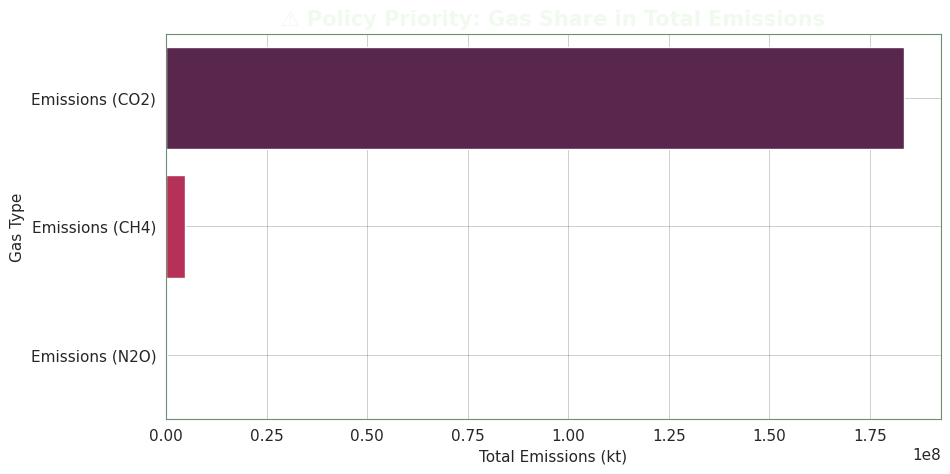

In [59]:
gas_share = (
    df.groupby("Element")["Value"]
      .sum()
      .sort_values(ascending=False)
      .reset_index()
)

plt.figure(figsize=(10,5))
sns.barplot(data=gas_share, x="Value", y="Element", palette="rocket")
plt.title("⚠️ Policy Priority: Gas Share in Total Emissions")
plt.xlabel("Total Emissions (kt)")
plt.ylabel("Gas Type")
plt.grid(True, alpha=0.3)
plt.show()

### **3. Regions Where Mitigation Impact is Highest**

In [60]:
df.columns

Index(['Domain Code', 'Domain', 'Area Code (M49)', 'Area', 'Element Code',
       'Element', 'Item Code', 'Item', 'Year Code', 'Year', 'Source Code',
       'Source', 'Unit', 'Value', 'Flag', 'Flag Description', 'Note',
       'Continent', 'Income Level'],
      dtype='object')

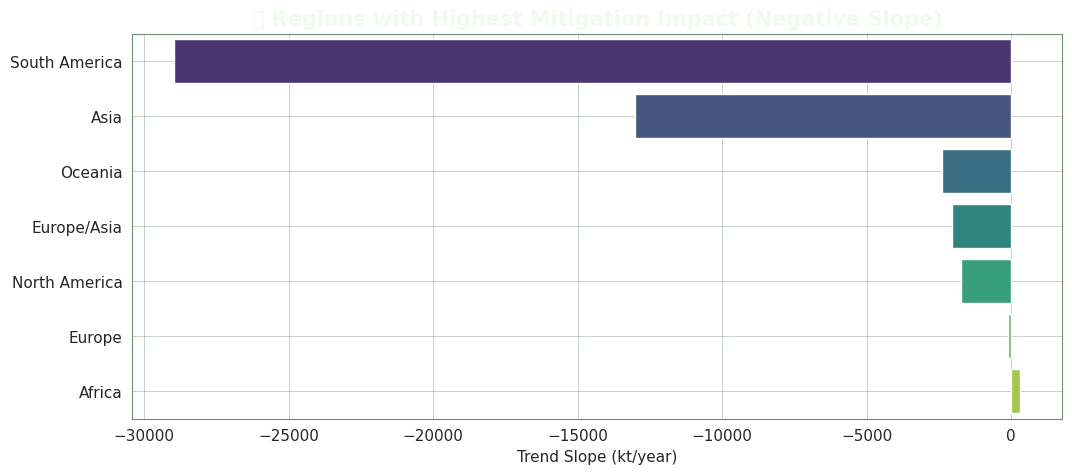

In [61]:
region_map = {
    "China": "Asia",
    "India": "Asia",
    "United States of America": "North America",
    "Brazil": "South America",
    "Russian Federation": "Europe/Asia",
    "Canada": "North America",
    "Australia": "Oceania",
    "South Africa": "Africa",
    "Nigeria": "Africa",
    "Germany": "Europe",
    "France": "Europe",
    "United Kingdom": "Europe",
    "Japan": "Asia",
    "Mexico": "North America",
    "Indonesia": "Asia",
    "Argentina": "South America"
}

# ---- STEP 2: Map Area to Region ----
df["Region"] = df["Area"].map(region_map)

# Remove missing region rows
df_region = df.dropna(subset=["Region"])

# ---- STEP 3: Regional emission trends ----
region_trend = (
    df_region.groupby(["Region", "Year"])["Value"]
             .sum()
             .reset_index()
)

region_slopes = []
for region, g in region_trend.groupby("Region"):
    X = g["Year"].values.reshape(-1, 1)
    y = g["Value"].values
    if len(X) < 5:
        continue
    model = LinearRegression().fit(X, y)
    region_slopes.append([region, model.coef_[0]])

region_slopes_df = pd.DataFrame(region_slopes, columns=["Region", "Slope"])
region_slopes_df = region_slopes_df.sort_values("Slope")

plt.figure(figsize=(12,5))
sns.barplot(data=region_slopes_df, x="Slope", y="Region", palette="viridis")
plt.title("🌍 Regions with Highest Mitigation Impact (Negative Slope)")
plt.xlabel("Trend Slope (kt/year)")
plt.ylabel("")
plt.grid(True, alpha=0.3)
plt.show()

### **4. Evidence of Decoupling (Economic Growth without Emission Rise)**

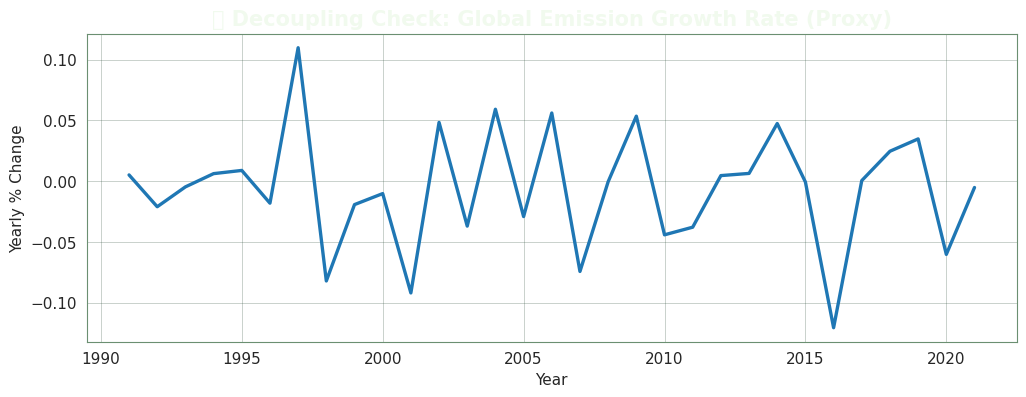

In [62]:
pop = df.groupby("Year")["Value"].sum().pct_change()
pop = pop.dropna()

plt.figure(figsize=(12,4))
pop.plot()
plt.title("🔄 Decoupling Check: Global Emission Growth Rate (Proxy)")
plt.ylabel("Yearly % Change")
plt.grid(True, alpha=0.3)
plt.show()

### **5. Countries at Risk of Future Emission Surges**

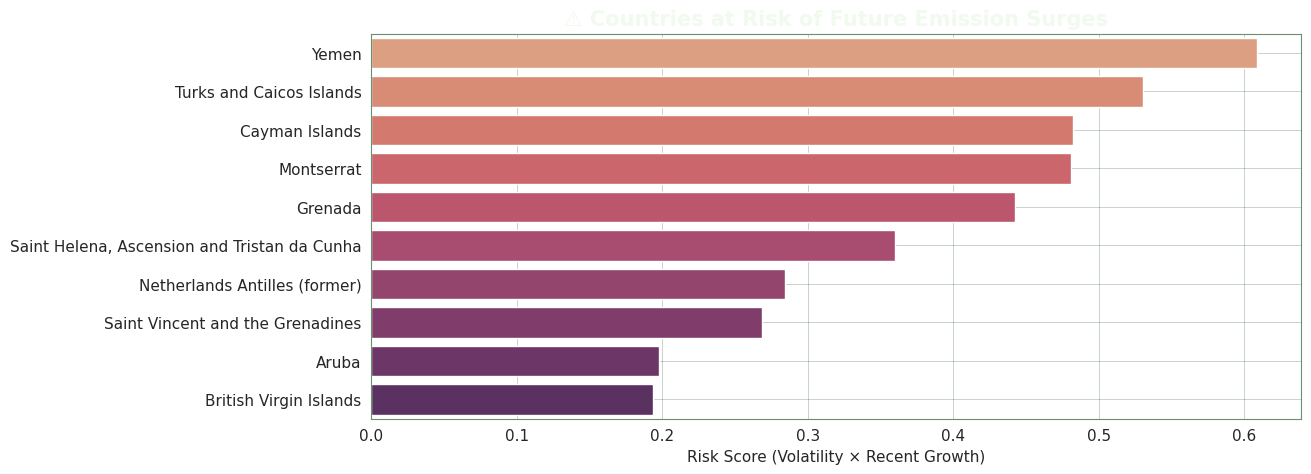

In [63]:
country_volatility = (
    df.groupby(["Area", "Year"])["Value"]
      .sum()
      .reset_index()
)

risk_scores = []
for country, g in country_volatility.groupby("Area"):
    g = g.sort_values("Year")
    if len(g) < 8:
        continue
    
    # volatility
    vol = g["Value"].pct_change().std()
    
    # recent growth
    recent_growth = (g["Value"].iloc[-1] - g["Value"].iloc[-5]) / g["Value"].iloc[-5]
    
    risk_scores.append([country, vol, recent_growth])

risk_df = pd.DataFrame(risk_scores, columns=["Country", "Volatility", "RecentGrowth"])
risk_df["RiskScore"] = risk_df["Volatility"] * risk_df["RecentGrowth"]
risk_df = risk_df.sort_values("RiskScore", ascending=False).head(10)

plt.figure(figsize=(12,5))
sns.barplot(data=risk_df, x="RiskScore", y="Country", palette="flare")
plt.title("⚠️ Countries at Risk of Future Emission Surges")
plt.xlabel("Risk Score (Volatility × Recent Growth)")
plt.ylabel("")
plt.grid(True, alpha=0.3)
plt.show()

---

## **Thank You!**

Thank you for exploring this comprehensive EDA on **global agricultural greenhouse gas emissions (1990–2021)**.  
I hope this analysis provided clear insights into emission trends, gas composition, country-level profiles, and policy-relevant signals.

---

### **🌍 Let’s keep the conversation going**
If you have suggestions, questions, or ideas for improvement, please let me know in the comments — I’d love to collaborate!

---

**Stay curious. Stay data-driven. 🌱**